In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
# Checking the shape of the dataset-
df.shape

(1000, 40)

In [4]:
# checking the names of all the columns 

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# checking the datatypes of all the columns 
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We have object ,float and integer type of data in the dataset.Our target variable is object datatype .

In [6]:
df.select_dtypes(include='object').nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

In [7]:
# Checking the information present in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can drop the column '_c39'and 'policy_number' as it is provided only for identification purpose of the insurance policy and '-c39' has no value in it.

In [8]:
# Checking the nunique values in each columns-
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
# Checking missing values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df['_c39'].unique()

array([nan])

In [11]:
#checking duplicate 
df.duplicated().sum()

0

In [12]:
# dropping the column'_c39'.

df.drop(['_c39','policy_number','insured_zip'], axis = 1, inplace = True)


In [13]:
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level  ... witnesses police_report_available  \
0                      MD  ...         2                     YES   
1                      MD  ...         0                       ?   
2                     PhD  ...         3                      NO   
3                     PhD  ...         2                      NO   
4               Associate  ...         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  auto_make  \
0              71610          6510           13020         52080       Saab   
1               5070           780             780          3510   Mercedes   
2              34650          7700            3850         23100      Dodge   
3              63400          6340            6340         50720  Chevrolet   
4               6500          1300             650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 37 columns]

In [14]:
#CHECKING '?' IN ALL THE COLUMNS .
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [15]:
for i in ['collision_type','property_damage','police_report_available']:
    df[i] = df[i].replace("?",np.nan)

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

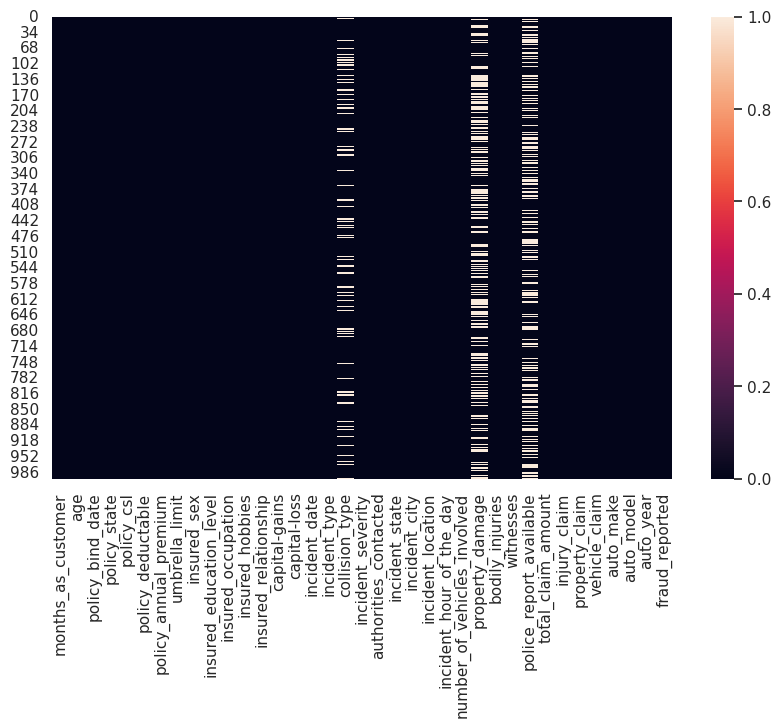

In [16]:
plt.figure(figsize=[10,6])

sns.heatmap(df.isnull())
print(df.isnull().sum())

In [17]:
#imputing the mode value for missing values in the columns.

for i in ['collision_type','property_damage','police_report_available']:
    df[i].fillna(df[i].mode()[0],inplace = True)
    

In [18]:
# Rechecking the null values -

df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [19]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object' :
        num_cols.append(i)
    
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)

In [20]:
num_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [21]:
cat_cols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [22]:
for i in cat_cols:
    print(("\033[1m"+i+"\033[0m"))
    print(df[i].value_counts())
    print("-"*50)

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
--------------------------------------------------
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
--------------------------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
--------------------------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
--------------------------------------------------
insured_occupation
machine-op-inspct    93
prof-specialty      

Most of the policy holders are female customers than male and are from Ohio while the least are from Indiana.
Most of the policy holder occupation and hobies inludes machine-op-inspct with a reading hobby.
Most of the insurance claims were made for minor damages.
After the incident , the damaage caused to the property was not so significant therefore,thoses cases were not reported to police.most of the incidents were happened in New York,South Carolina,Springfield and Arlington.
Most of the claims were made for vehicles of Subaru, Saab and Dodge brands with auto model of 'RAM' and 'Wrangler'.

In [23]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    1000.000000  1000.000000  
mean    37928.950000  2005.103000  
std     18886.252893     6.015861  
min        70.000000  1995.000000  
25%     30292.500000  2000.000000  
50%     42100.000000  2005.000000  
75%     50822.500000  2010.000000  
max     79560.000000  2015.000000

<function matplotlib.pyplot.show(close=None, block=None)>

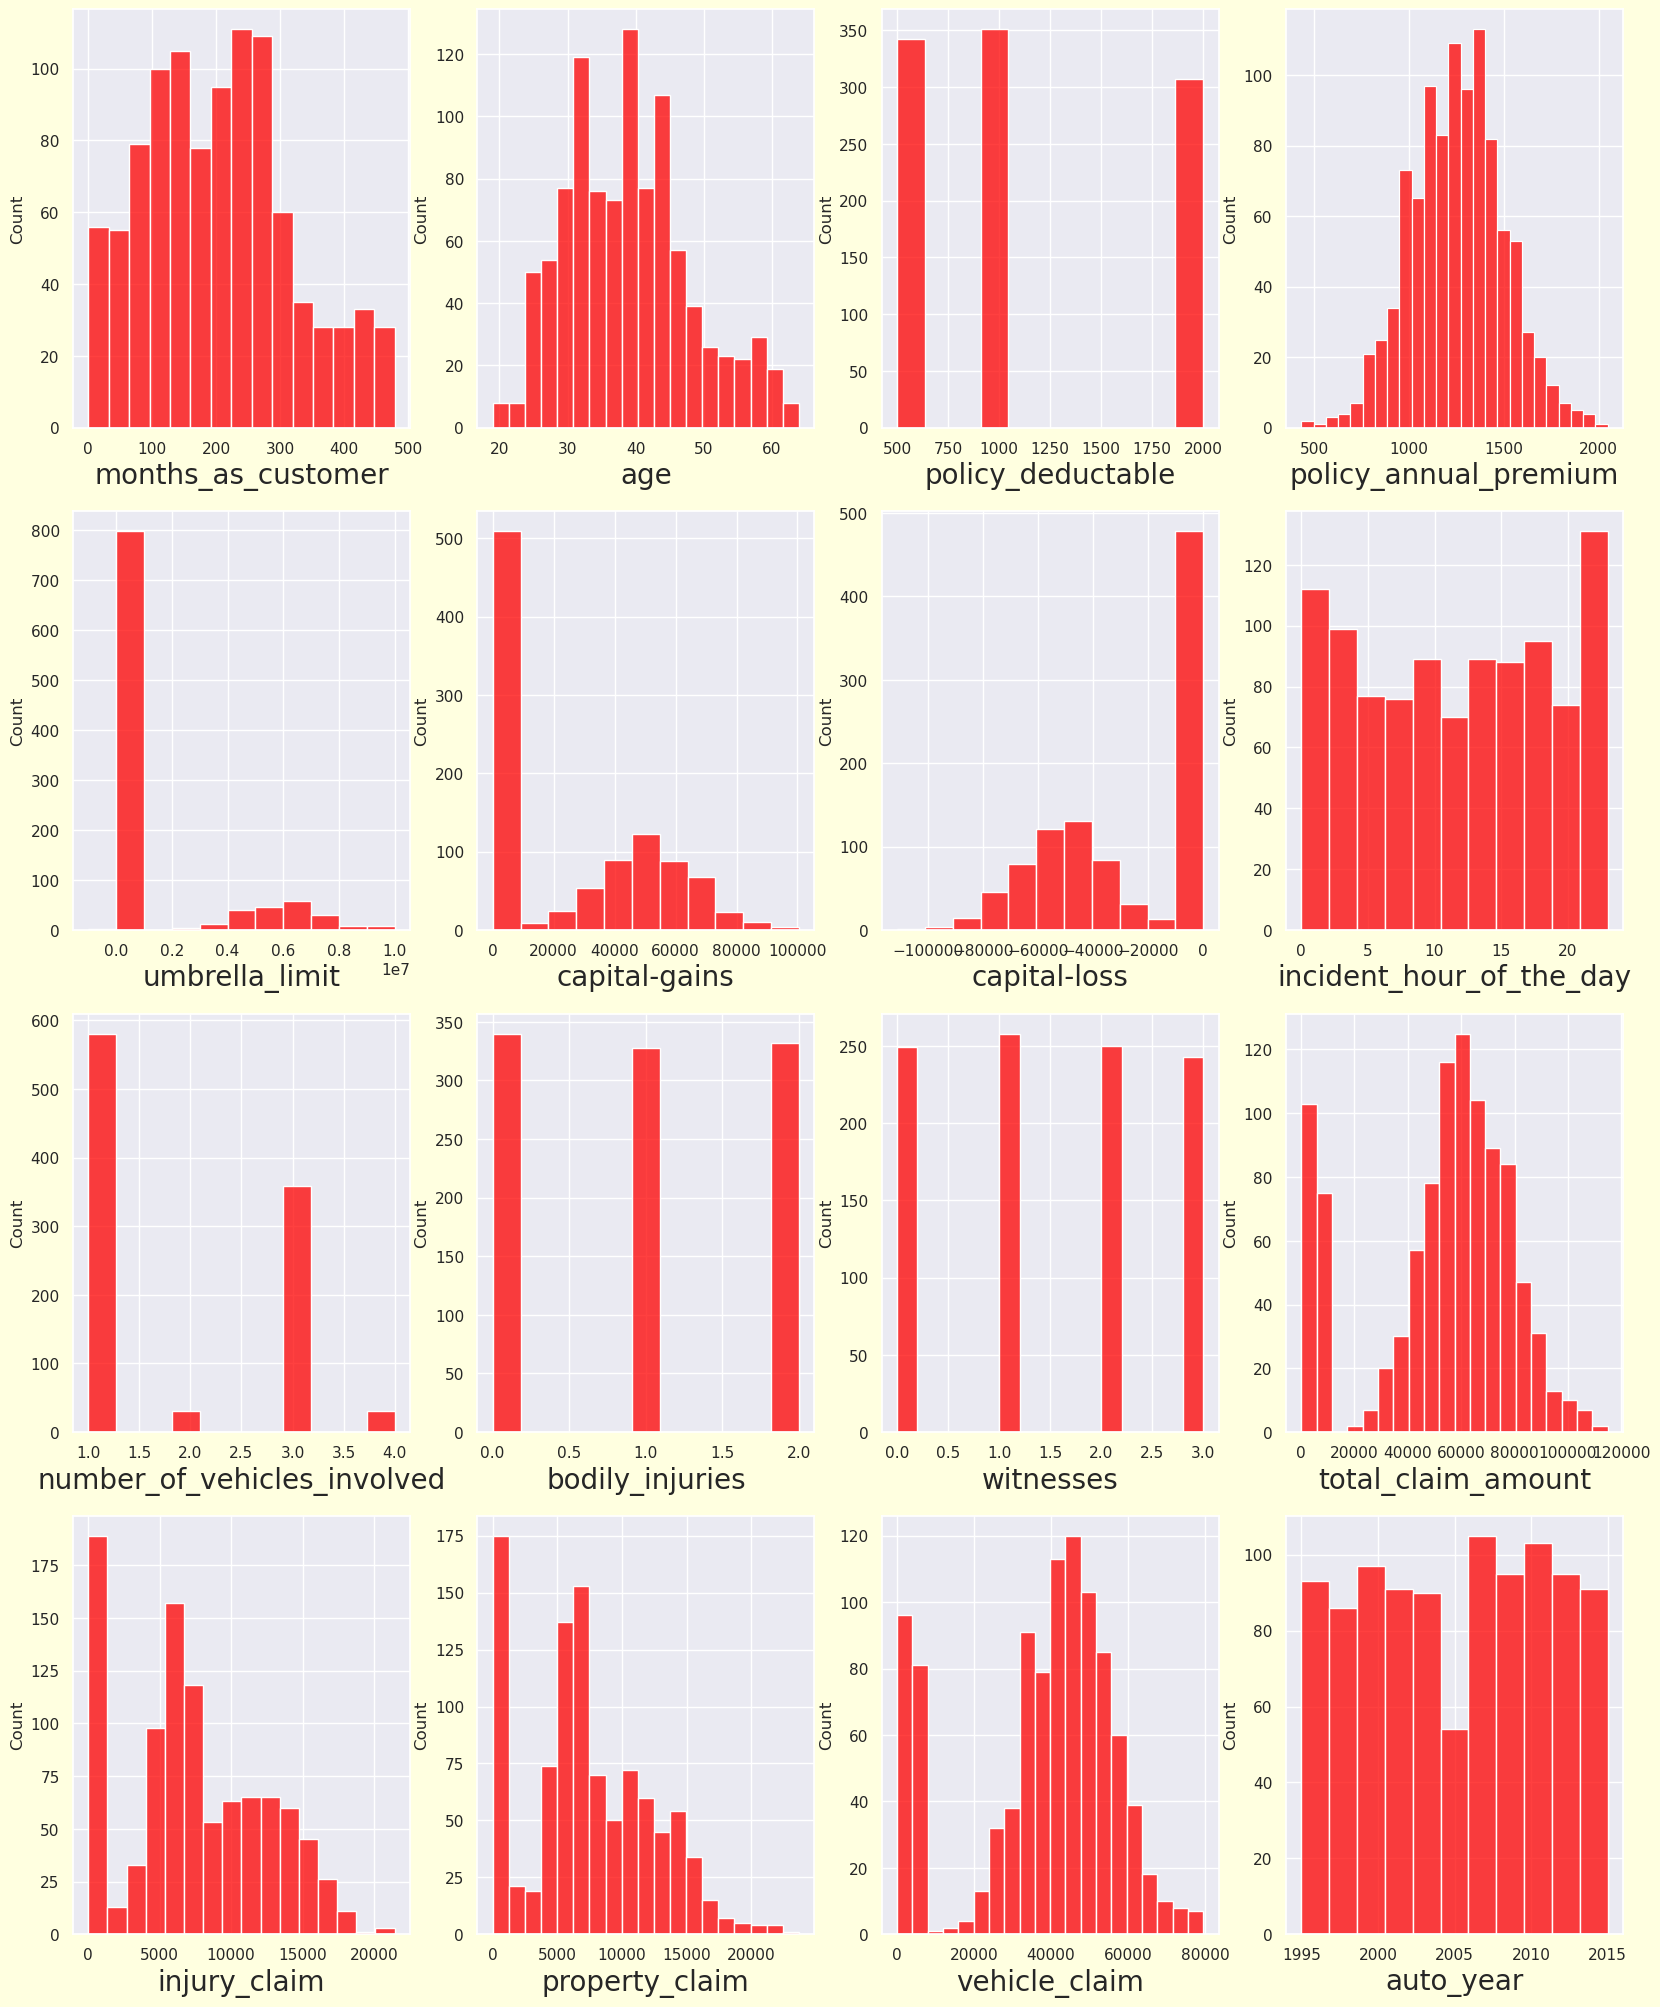

In [24]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnum=1
for col in num_cols:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.histplot(df[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

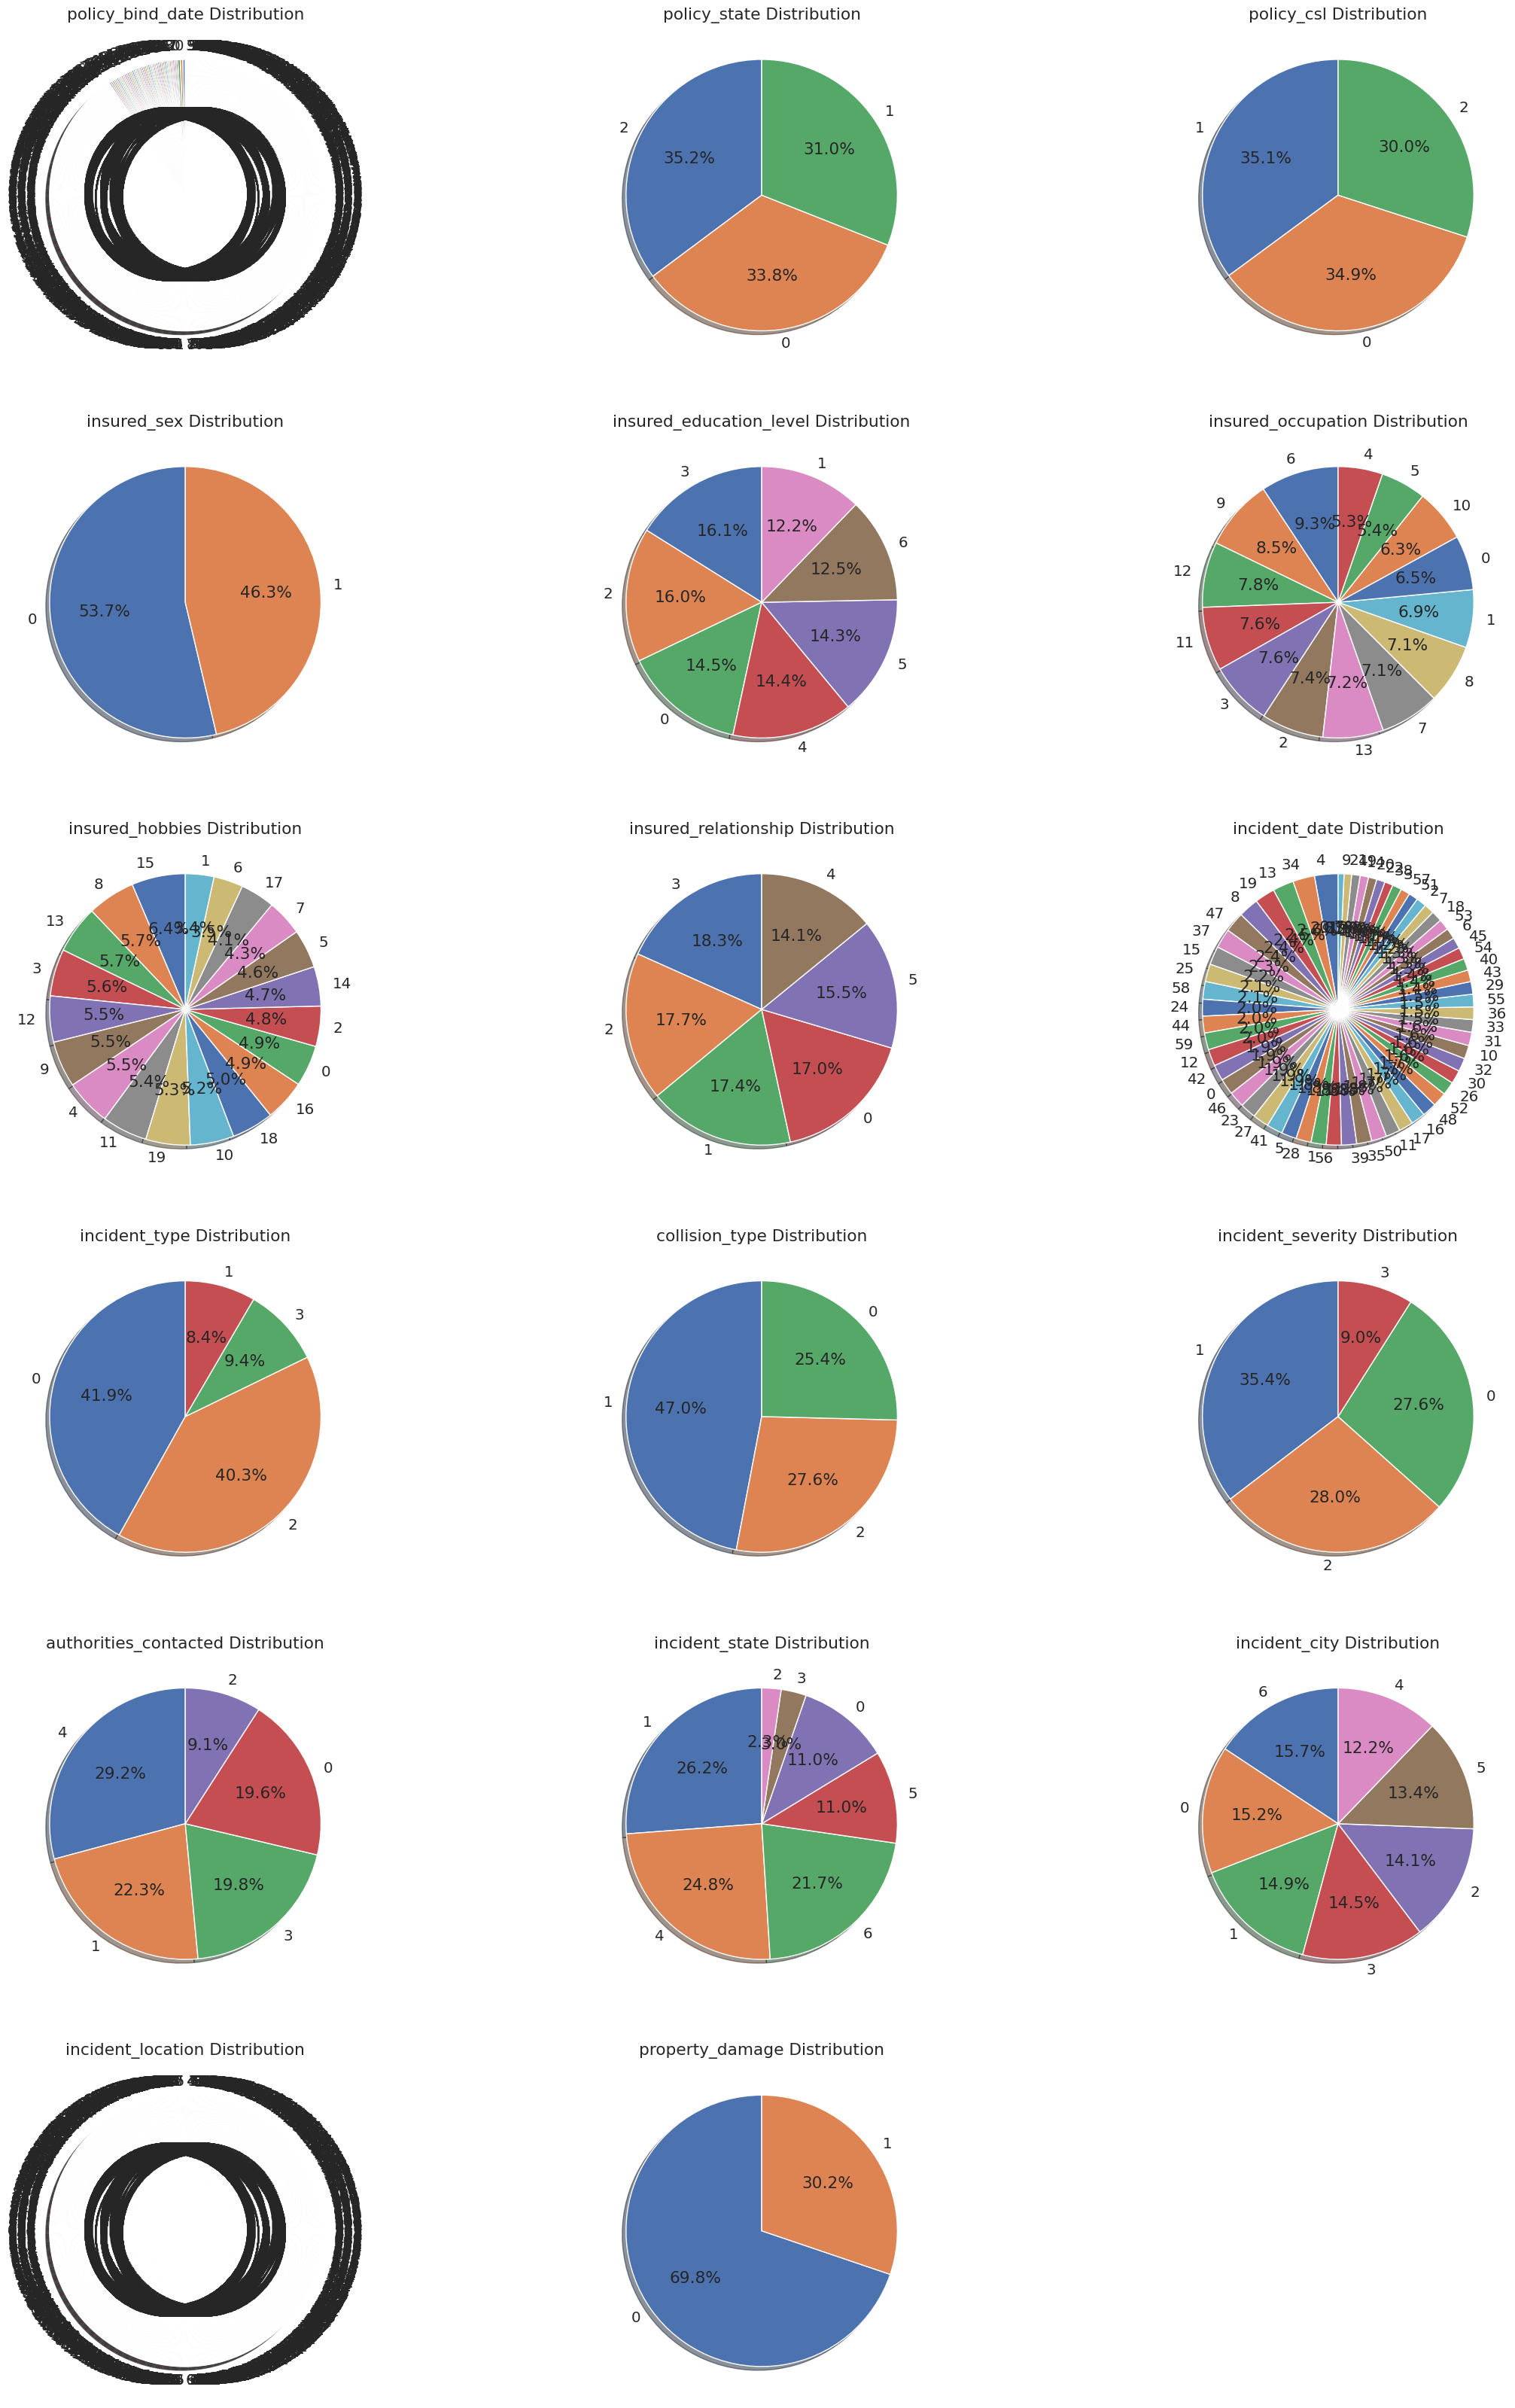

In [90]:
# Create figure with subplots 
fig,axs=plt.subplots(nrows=7,ncols=3, figsize=(28,48))

#create a pie chart
for i,var in enumerate(cat_cols):
    if i =='auto_model':
        continue
    if i < len(axs.flat):
        cat=df[var].value_counts()
        axs.flat[i].pie(cat,labels=cat.index, autopct='%1.1f%%',startangle=90,shadow=True)
        axs.flat[i].set_title(f'{var} Distribution')   
axs[5,2].remove()
axs[6,0].remove()
axs[6,1].remove()
axs[6,2].remove()
        
plt.show()

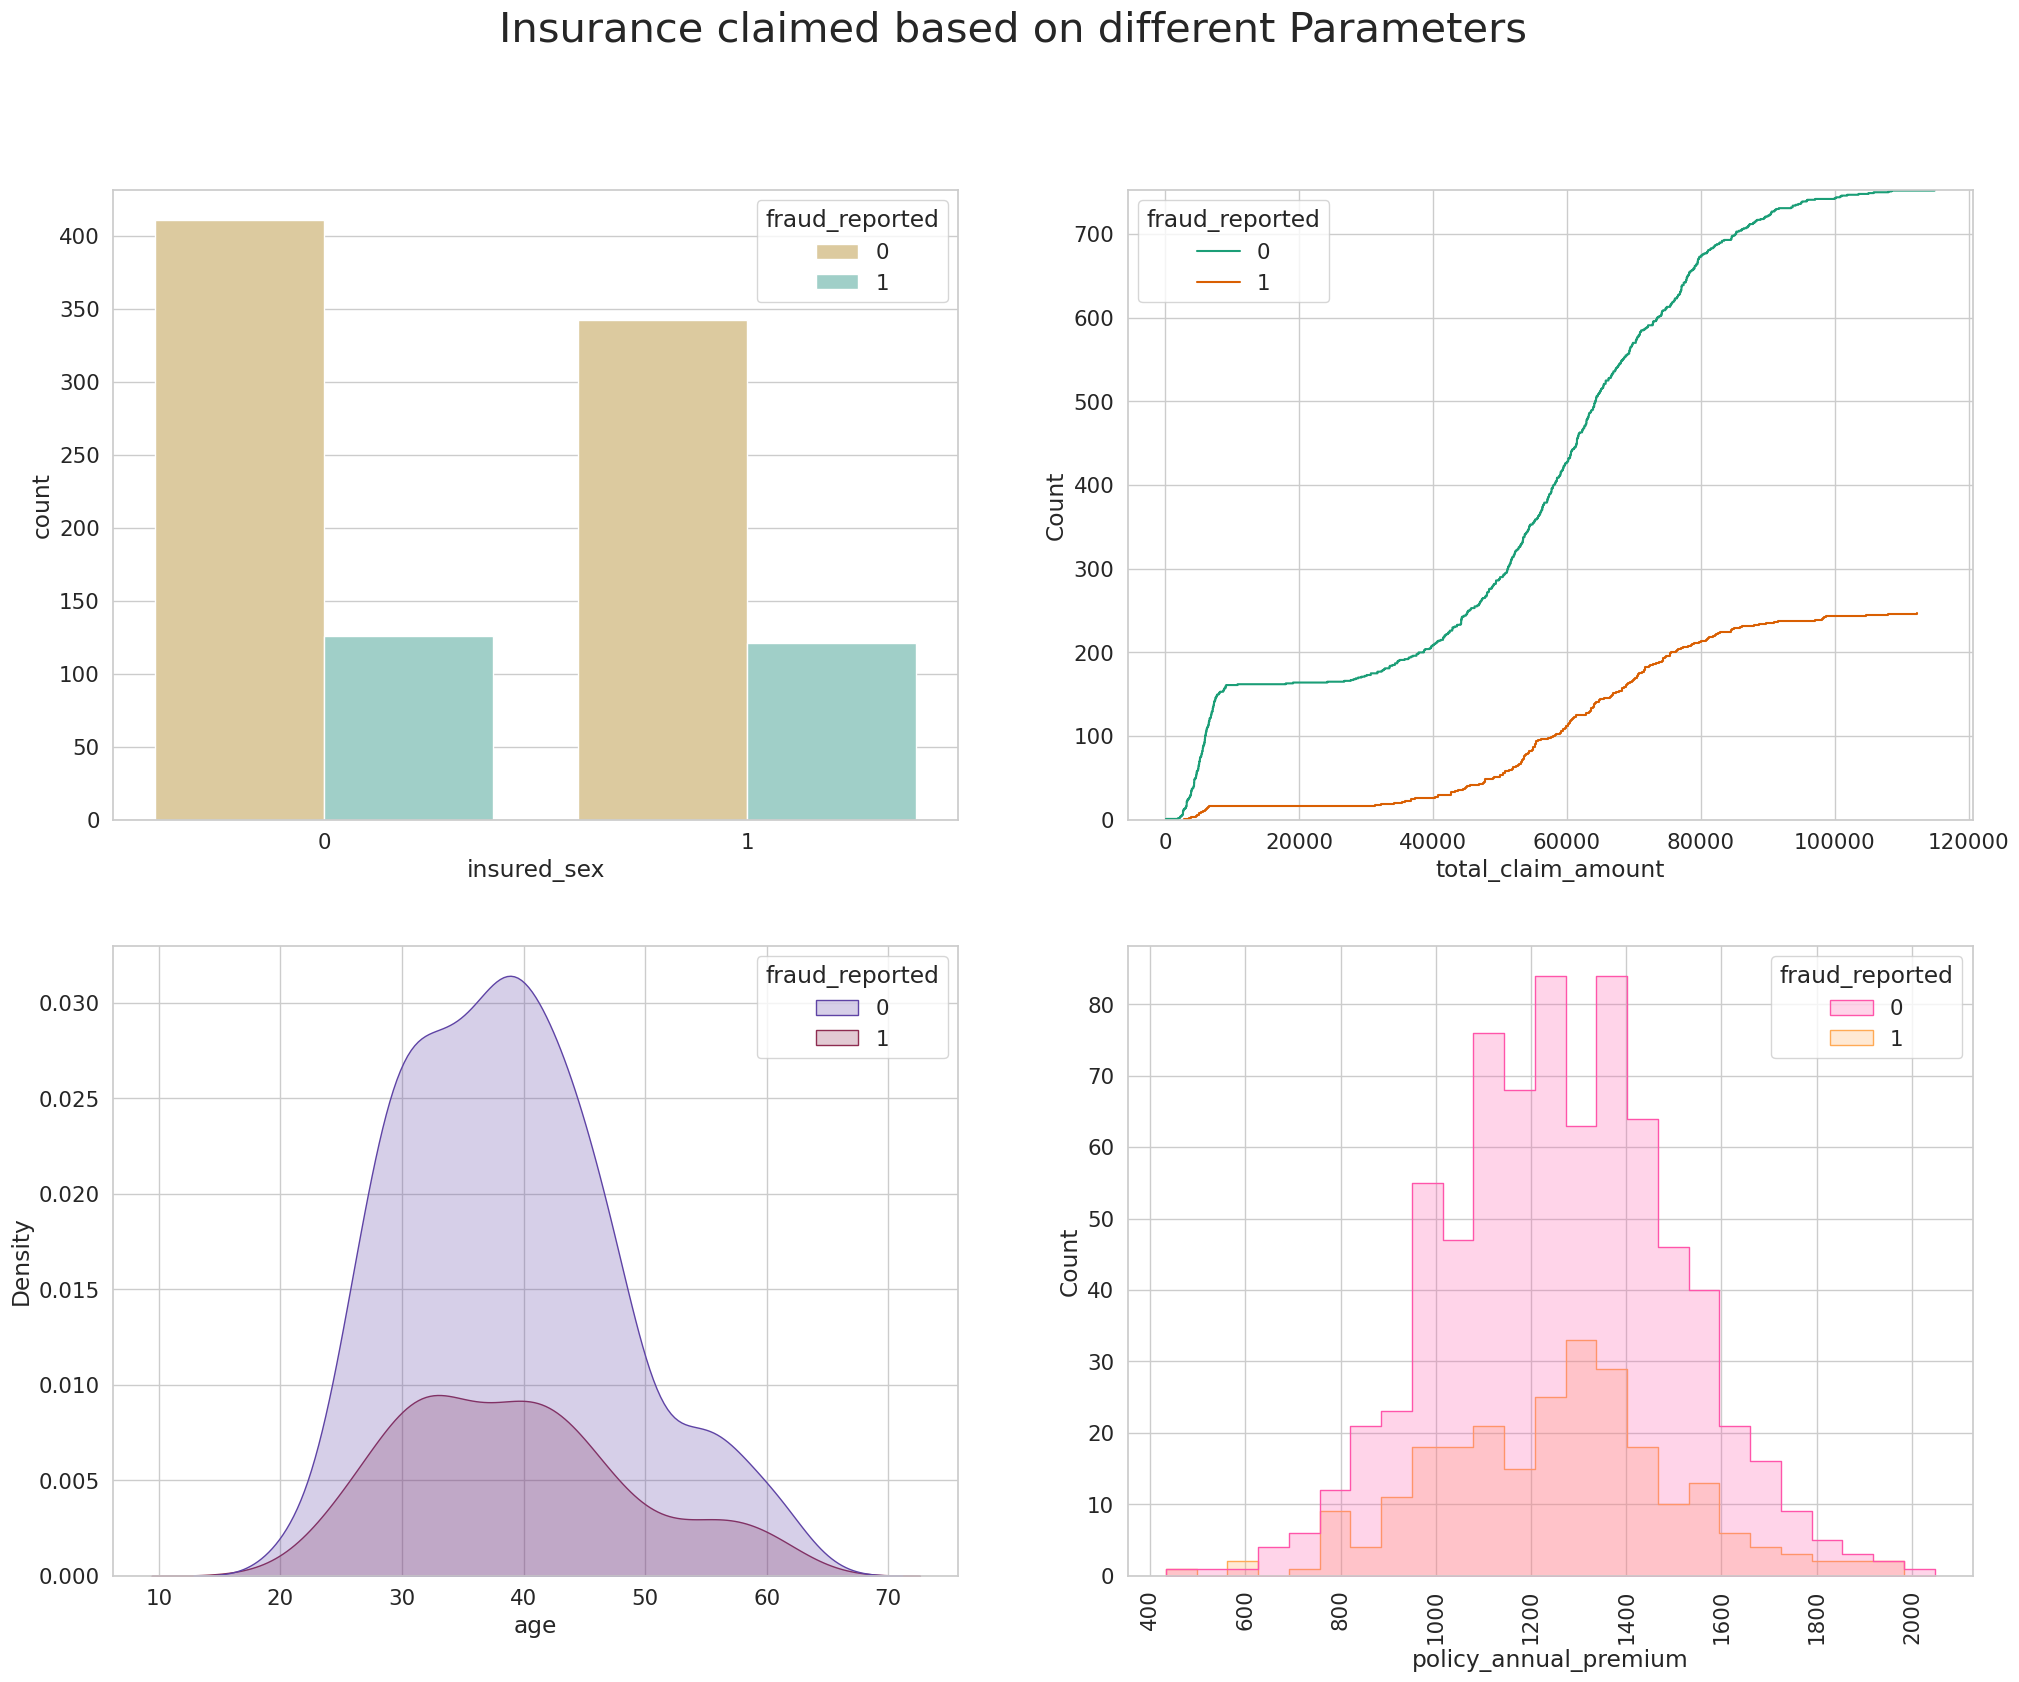

In [94]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
fig,axes = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Insurance claimed based on different Parameters',fontsize=30) 
sns.countplot(ax=axes[0, 0],x='insured_sex',hue='fraud_reported',data=df,palette="BrBG") 
sns.ecdfplot(ax=axes[0, 1],x='total_claim_amount',hue='fraud_reported', data=df,palette="Dark2",stat='count')
sns.kdeplot(ax=axes[1, 0],x='age',hue='fraud_reported',data=df,palette="twilight",shade=True)
sns.histplot(ax=axes[1, 1],x='policy_annual_premium',hue='fraud_reported',data=df,palette="spring",element='step')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='incident_type', ylabel='incident_hour_of_the_day'>

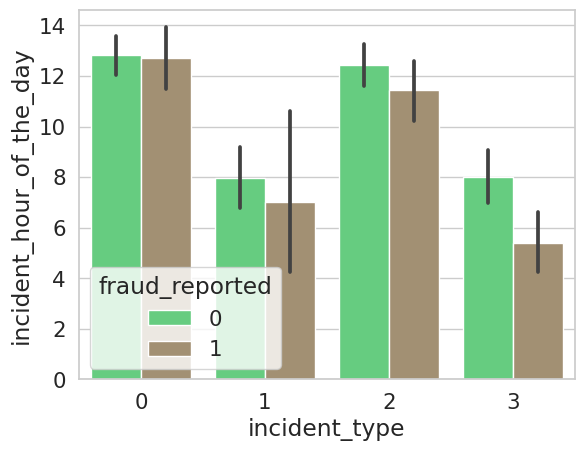

In [95]:
sns.barplot(x='incident_type',y='incident_hour_of_the_day',hue='fraud_reported',data=df,palette="terrain")

<AxesSubplot:xlabel='insured_occupation', ylabel='months_as_customer'>

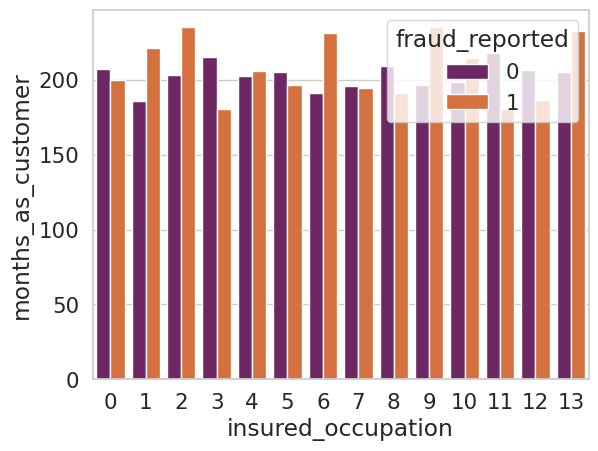

In [96]:
sns.barplot(x='insured_occupation',y='months_as_customer',hue='fraud_reported',data=df,palette='inferno',errorbar=None)

<function matplotlib.pyplot.show(close=None, block=None)>

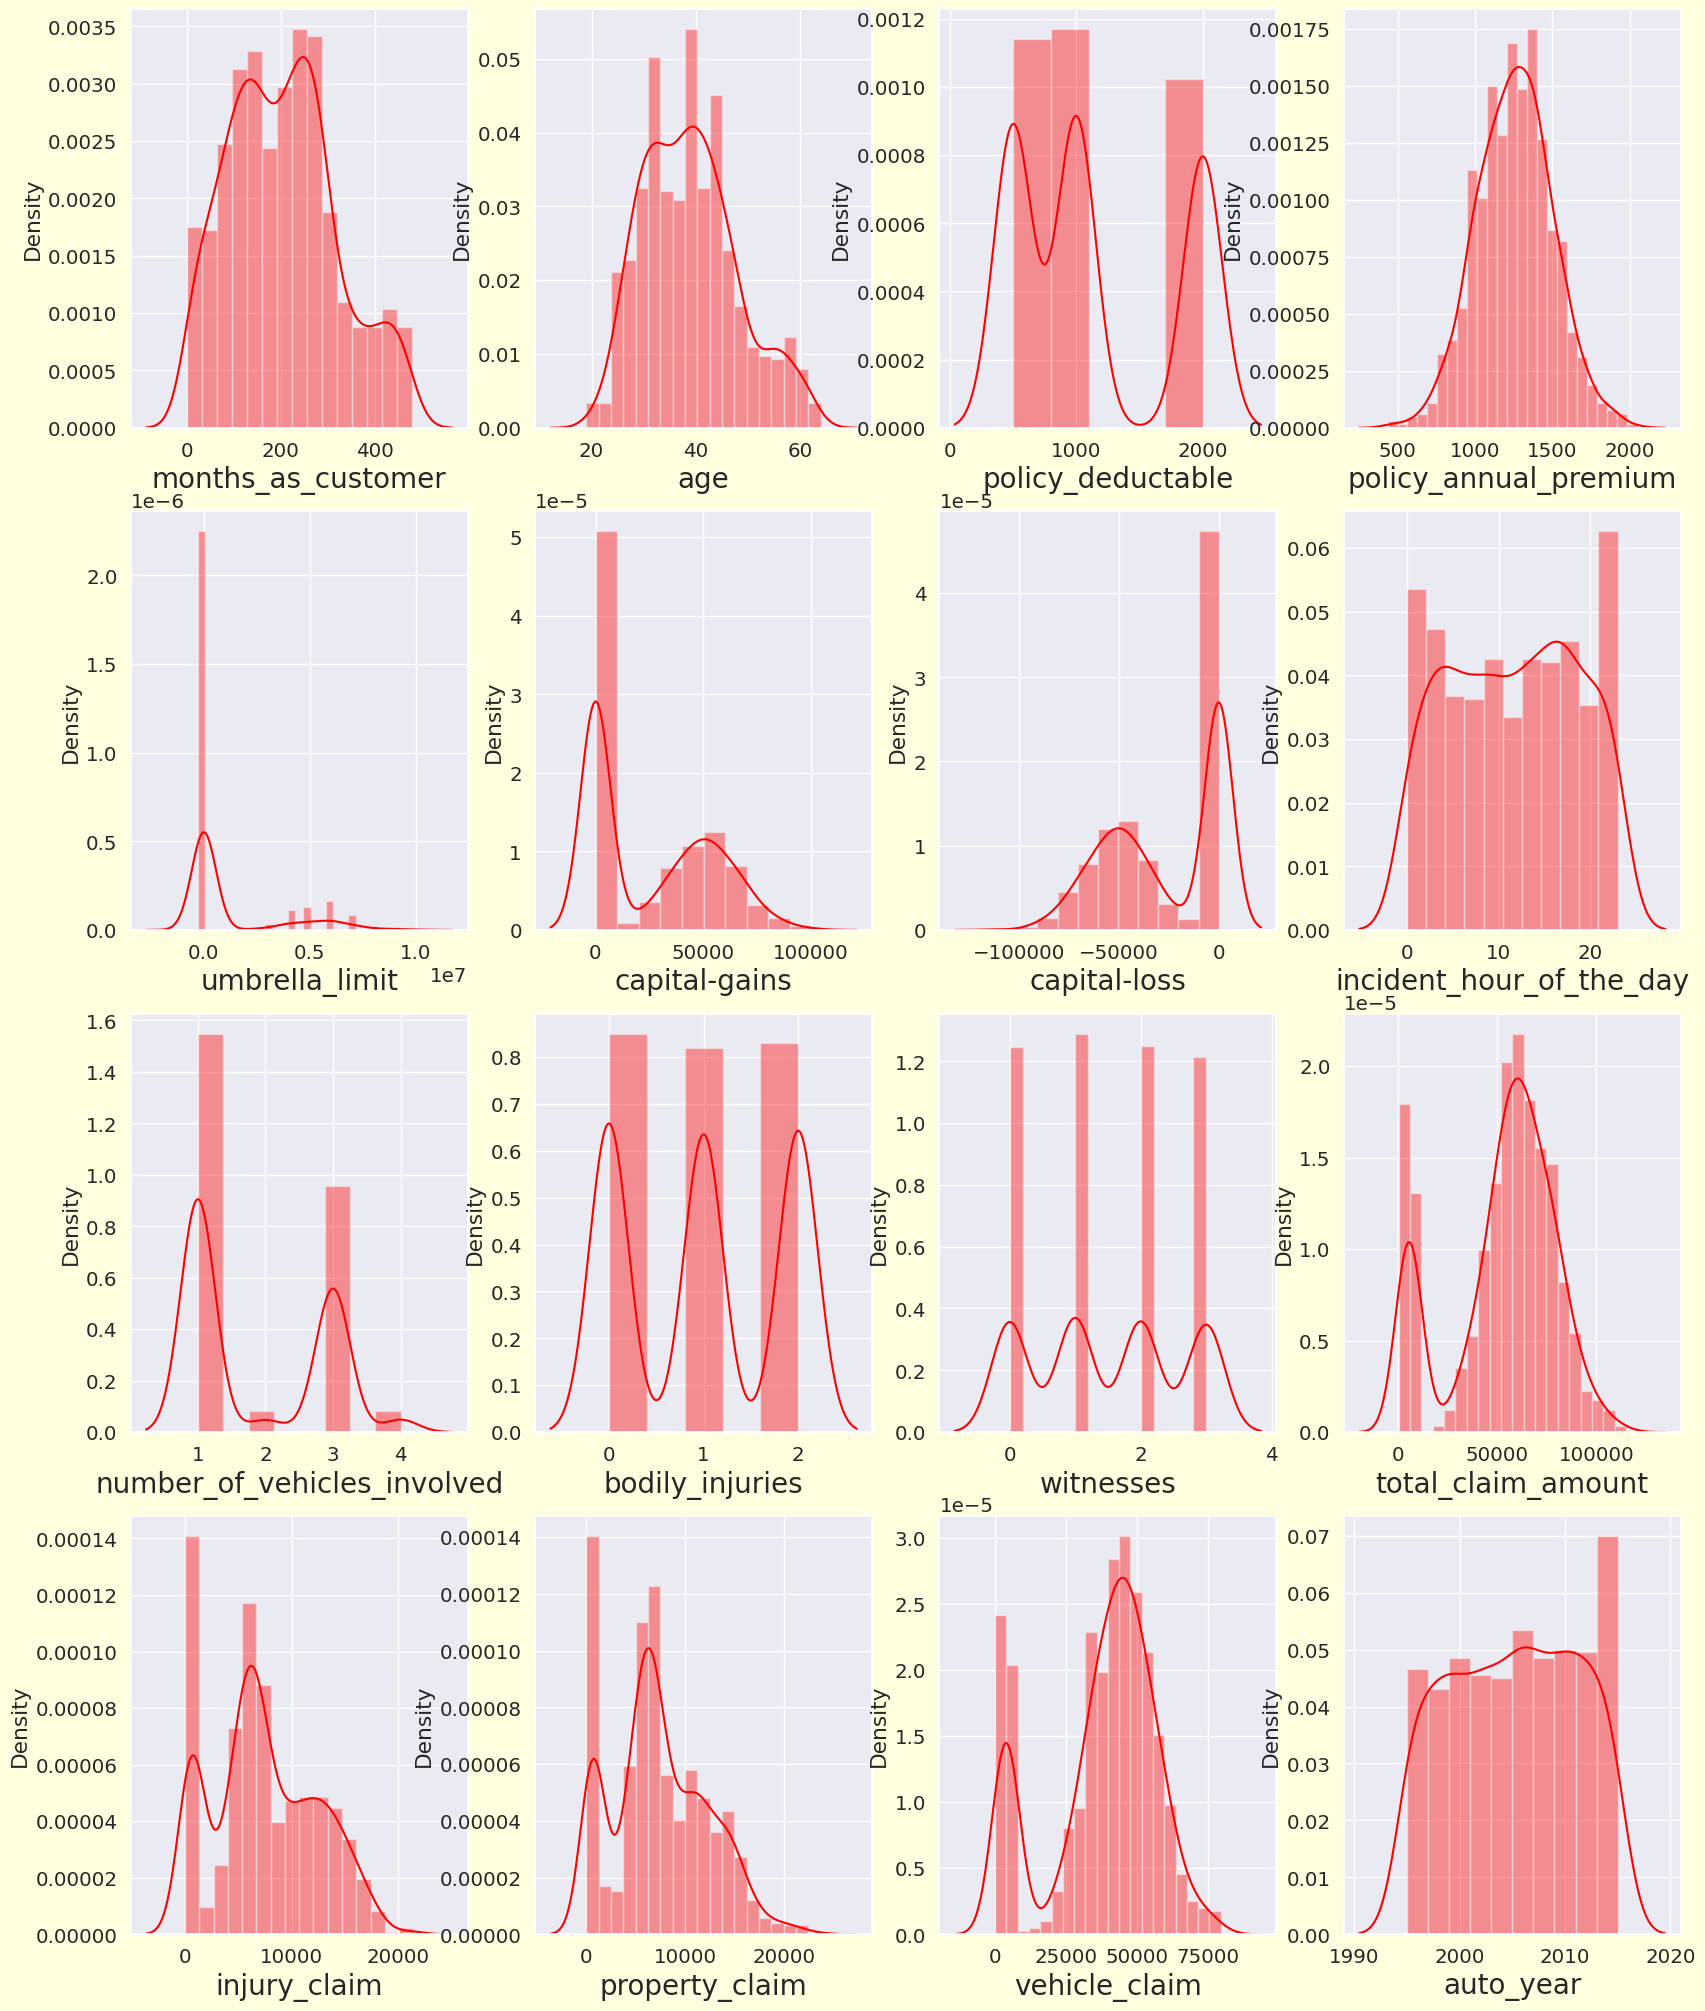

In [27]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnum=1
for col in num_cols:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

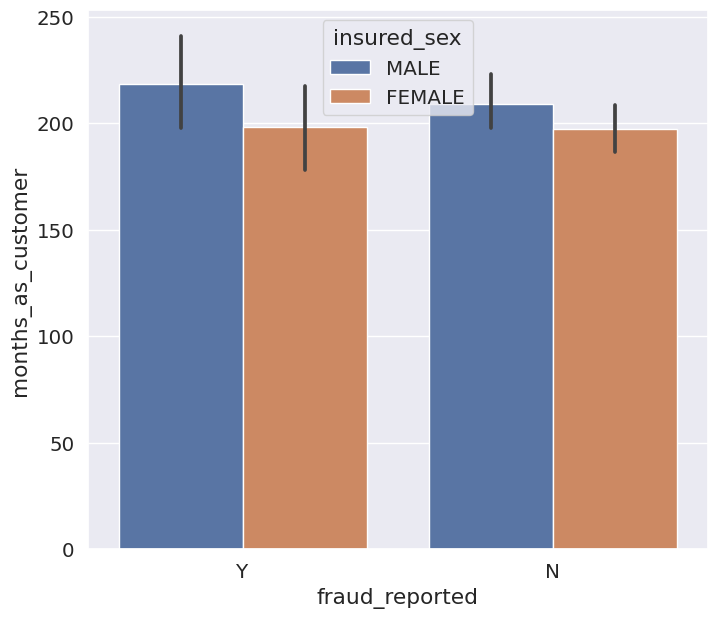

In [28]:
plt.figure(figsize = [8,7])
sns.barplot( x ='fraud_reported', y='months_as_customer',data = df, hue = 'insured_sex')
plt.show()

 most of the frauds cases were reported for insured male compared to females.

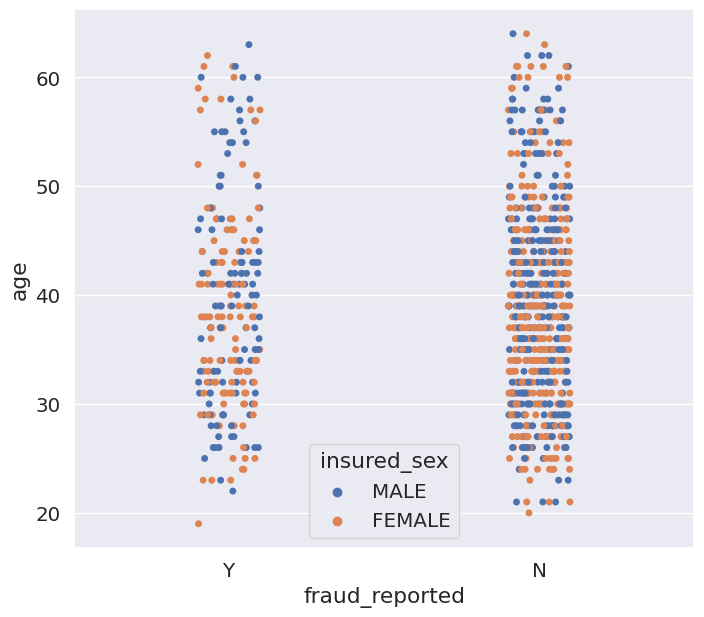

In [29]:
plt.figure(figsize = [8,7])
sns.stripplot(x='fraud_reported',y='age',data = df, hue = 'insured_sex')
plt.show()

- Majority not reported fraud for claim are between the age of 26 to 46

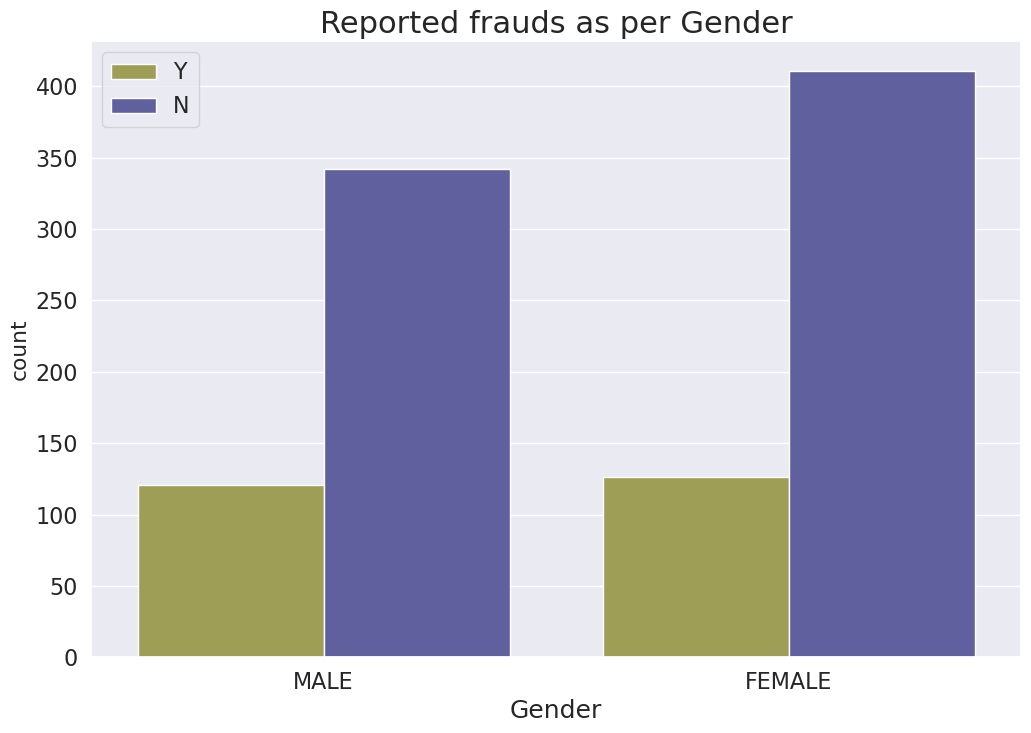

In [30]:
plt.figure(figsize=(12,8))
p = sns.countplot(x=df['insured_sex'], hue=df['fraud_reported'], palette='gist_stern_r')
plt.title('Reported frauds as per Gender', fontsize=22)
p.set_xlabel('Gender',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Almost equal number of frauds were reported for both male and female

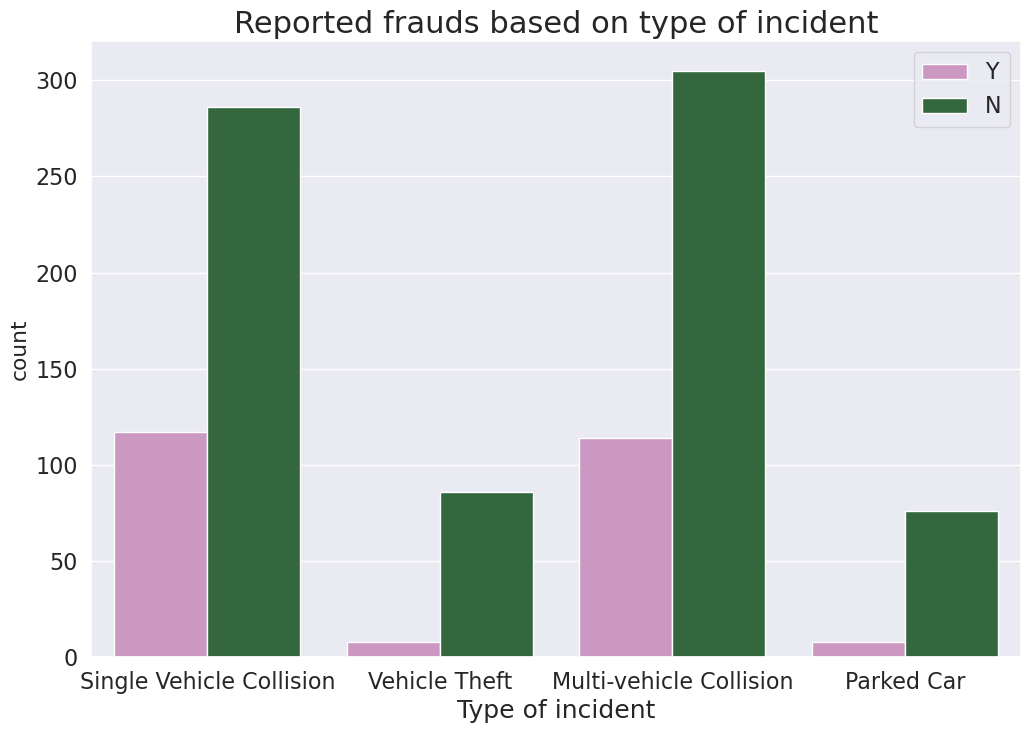

In [31]:
plt.figure(figsize=(12,8))
p = sns.countplot(x =df['incident_type'], hue=df['fraud_reported'], palette='cubehelix_r')
plt.title('Reported frauds based on type of incident', fontsize=22)
p.set_xlabel('Type of incident',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

For Single amd multi vehicle collision mostly frauds were reported 

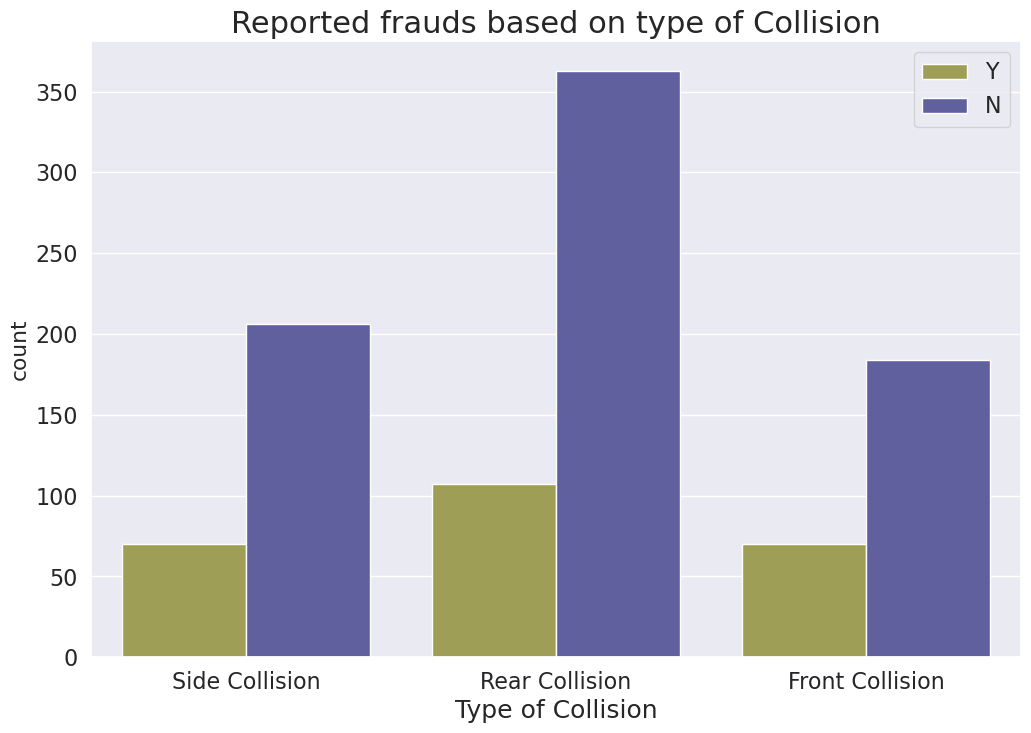

In [32]:
plt.figure(figsize=(12,8))
p = sns.countplot(x=df['collision_type'], hue=df['fraud_reported'], palette='gist_stern_r')
plt.title('Reported frauds based on type of Collision', fontsize=22)
p.set_xlabel('Type of Collision',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Majority frauds were reported for rear type of collision

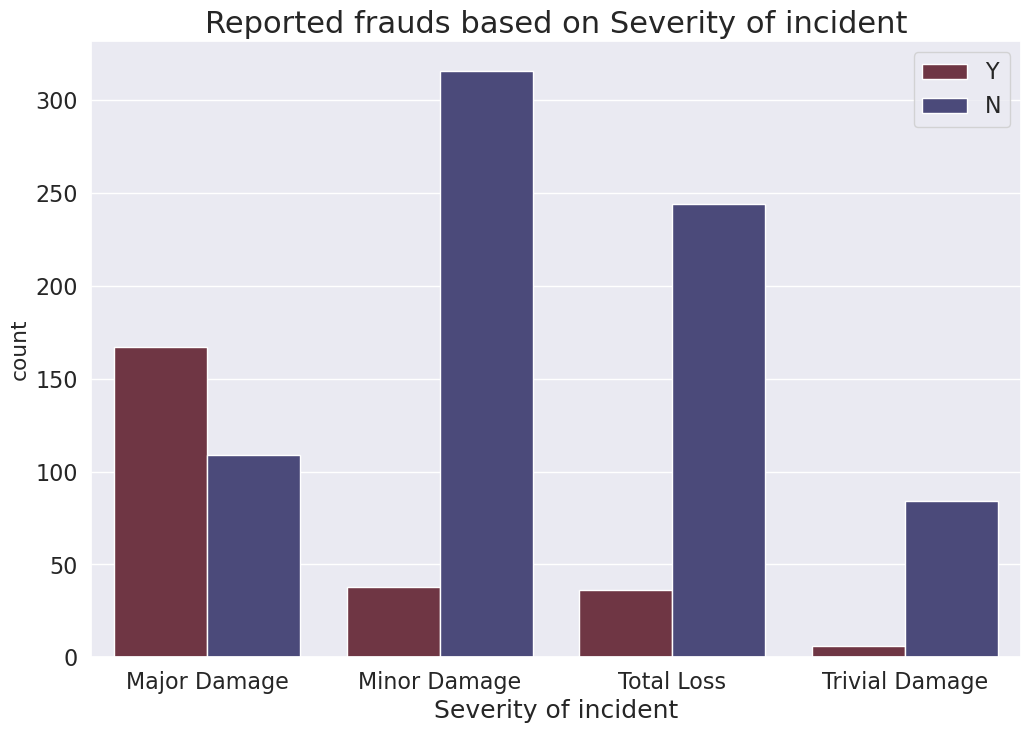

In [33]:
plt.figure(figsize=(12,8))
p = sns.countplot(x=df['incident_severity'], hue=df['fraud_reported'], palette='icefire_r')
plt.title('Reported frauds based on Severity of incident', fontsize=22)
p.set_xlabel('Severity of incident',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Majority frauds were reported for Major damage as per the severity of incident.

In [34]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    1000.000000  1000.000000  
mean    37928.950000  2005.103000  
std     18886.252893     6.015861  
min        70.000000  1995.000000  
25%     30292.500000  2000.000000  
50%     42100.000000  2005.000000  
75%     50822.500000  2010.000000  
max     79560.000000  2015.000000

Most of the columns are having the mean value higher than the median value.hence skewness is present.
The difference between the maximum value and the 75% is huge in some columns such as 'months_as_customer','age','policy_annual_premium','umbrella_limit,'capital-Gains','incident_hour_of_the_day','total_claim_amount','injury_claim property_claim','vehicle_claim','auto_year', 'incident_day' and 'incident_month'hence possible outliers.

In [35]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='CMRmap_r')

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))
df.head()     


months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                 328   48               532             2           1   
1                 228   42               821             1           1   
2                 134   29               186             2           0   
3                 256   41               766             0           1   
4                 228   44               181             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0               1000                1406.91               0            1   
1               2000                1197.22         5000000            1   
2               2000                1413.14         5000000            0   
3               2000                1415.74         6000000            0   
4               1000                1583.91         6000000            1   

   insured_education_level  ...  witnesses  police_report_available  \
0                        4  ...          2                        1   
1                        4  ...          0                        0   
2                        6  ...          3                        0   
3                        6  ...          2                        0   
4                        0  ...          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  
0           1       2004               1  
1          12       2007               1  
2          30       2007               0  
3          34       2014               1  
4          31       2009               0  

[5 rows x 37 columns]

<AxesSubplot:>

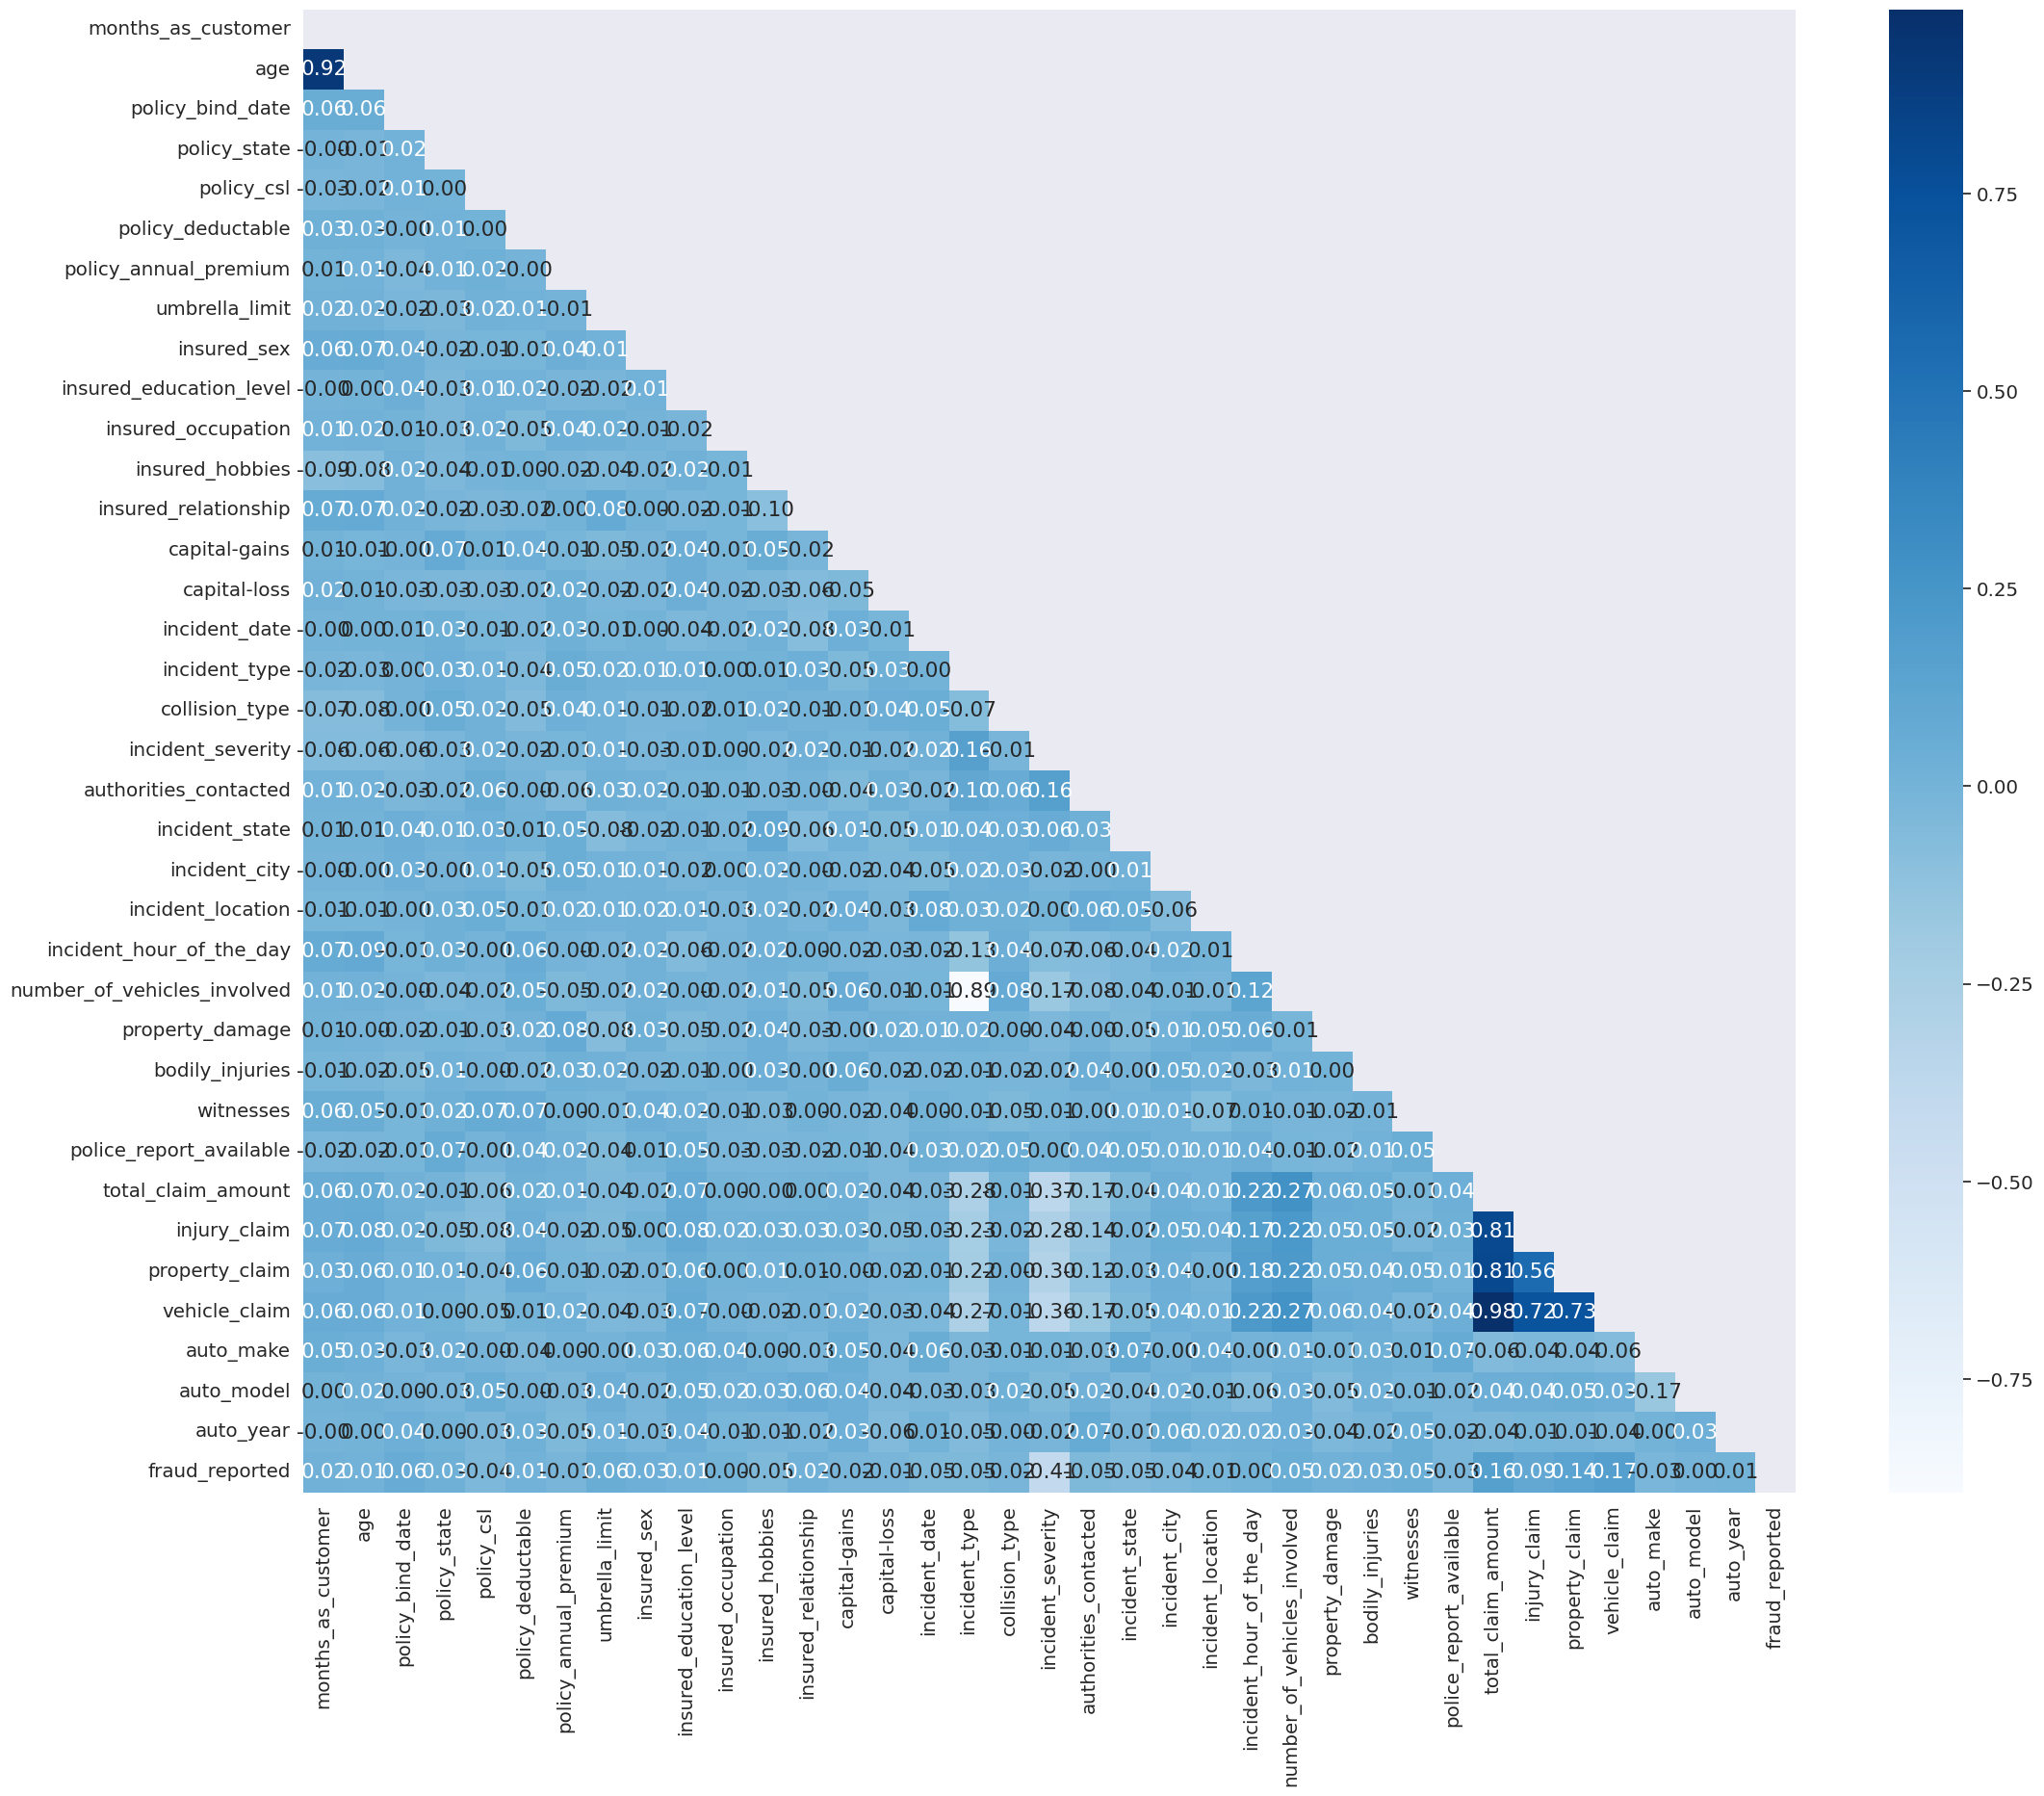

In [37]:
#Plotting the correlation of columns
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot = True, fmt = '0.2f',cmap='Blues')

vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863
collision_type                -0.017315


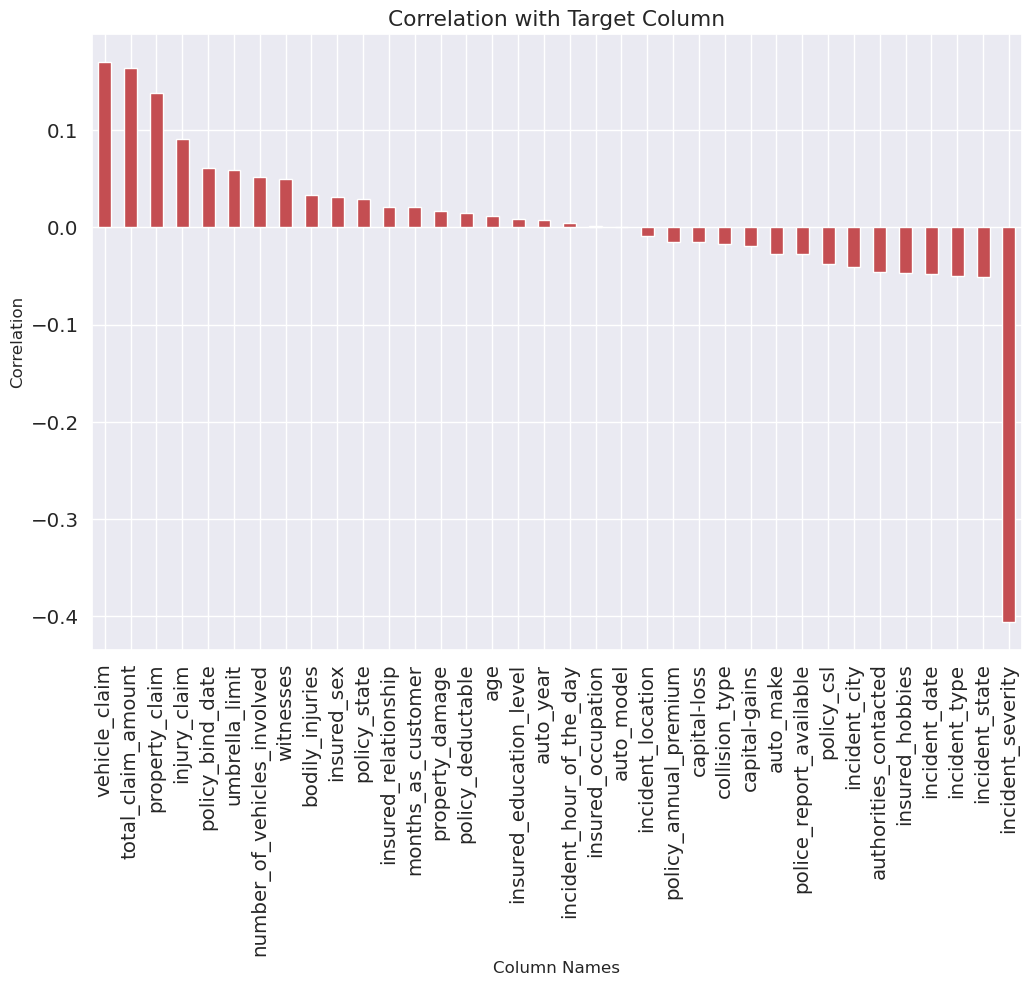

In [38]:
print(df.corr()['fraud_reported'].drop('fraud_reported').sort_values(ascending = False))
plt.figure(figsize = [12,8])
df.corr()['fraud_reported'].sort_values(ascending= False).drop('fraud_reported').plot(kind = 'bar', color ='r')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

The columns 'vehicle_claim', 'total_claim_amount', 'property_claim', 'injury_claim', 'policy_bind_day', 'umbrella_limit', 'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state', 'insured_relationship', 'months_as_customer', 'property_damage', 'policy_deductable', 'age', 'insured_education_level', 'auto_year', 'incident_hour_of_the_day', 'insured_occupation', 'auto_model' are having positive correlation to the target variable 'fraud_reported'.

The column 'vehicle_claim' is having the highest positive correlation with the target variable 'fraud_reported', while the column 'incident_severity' is having highest negatvie correlation with the target variable 'fraud_reported'.

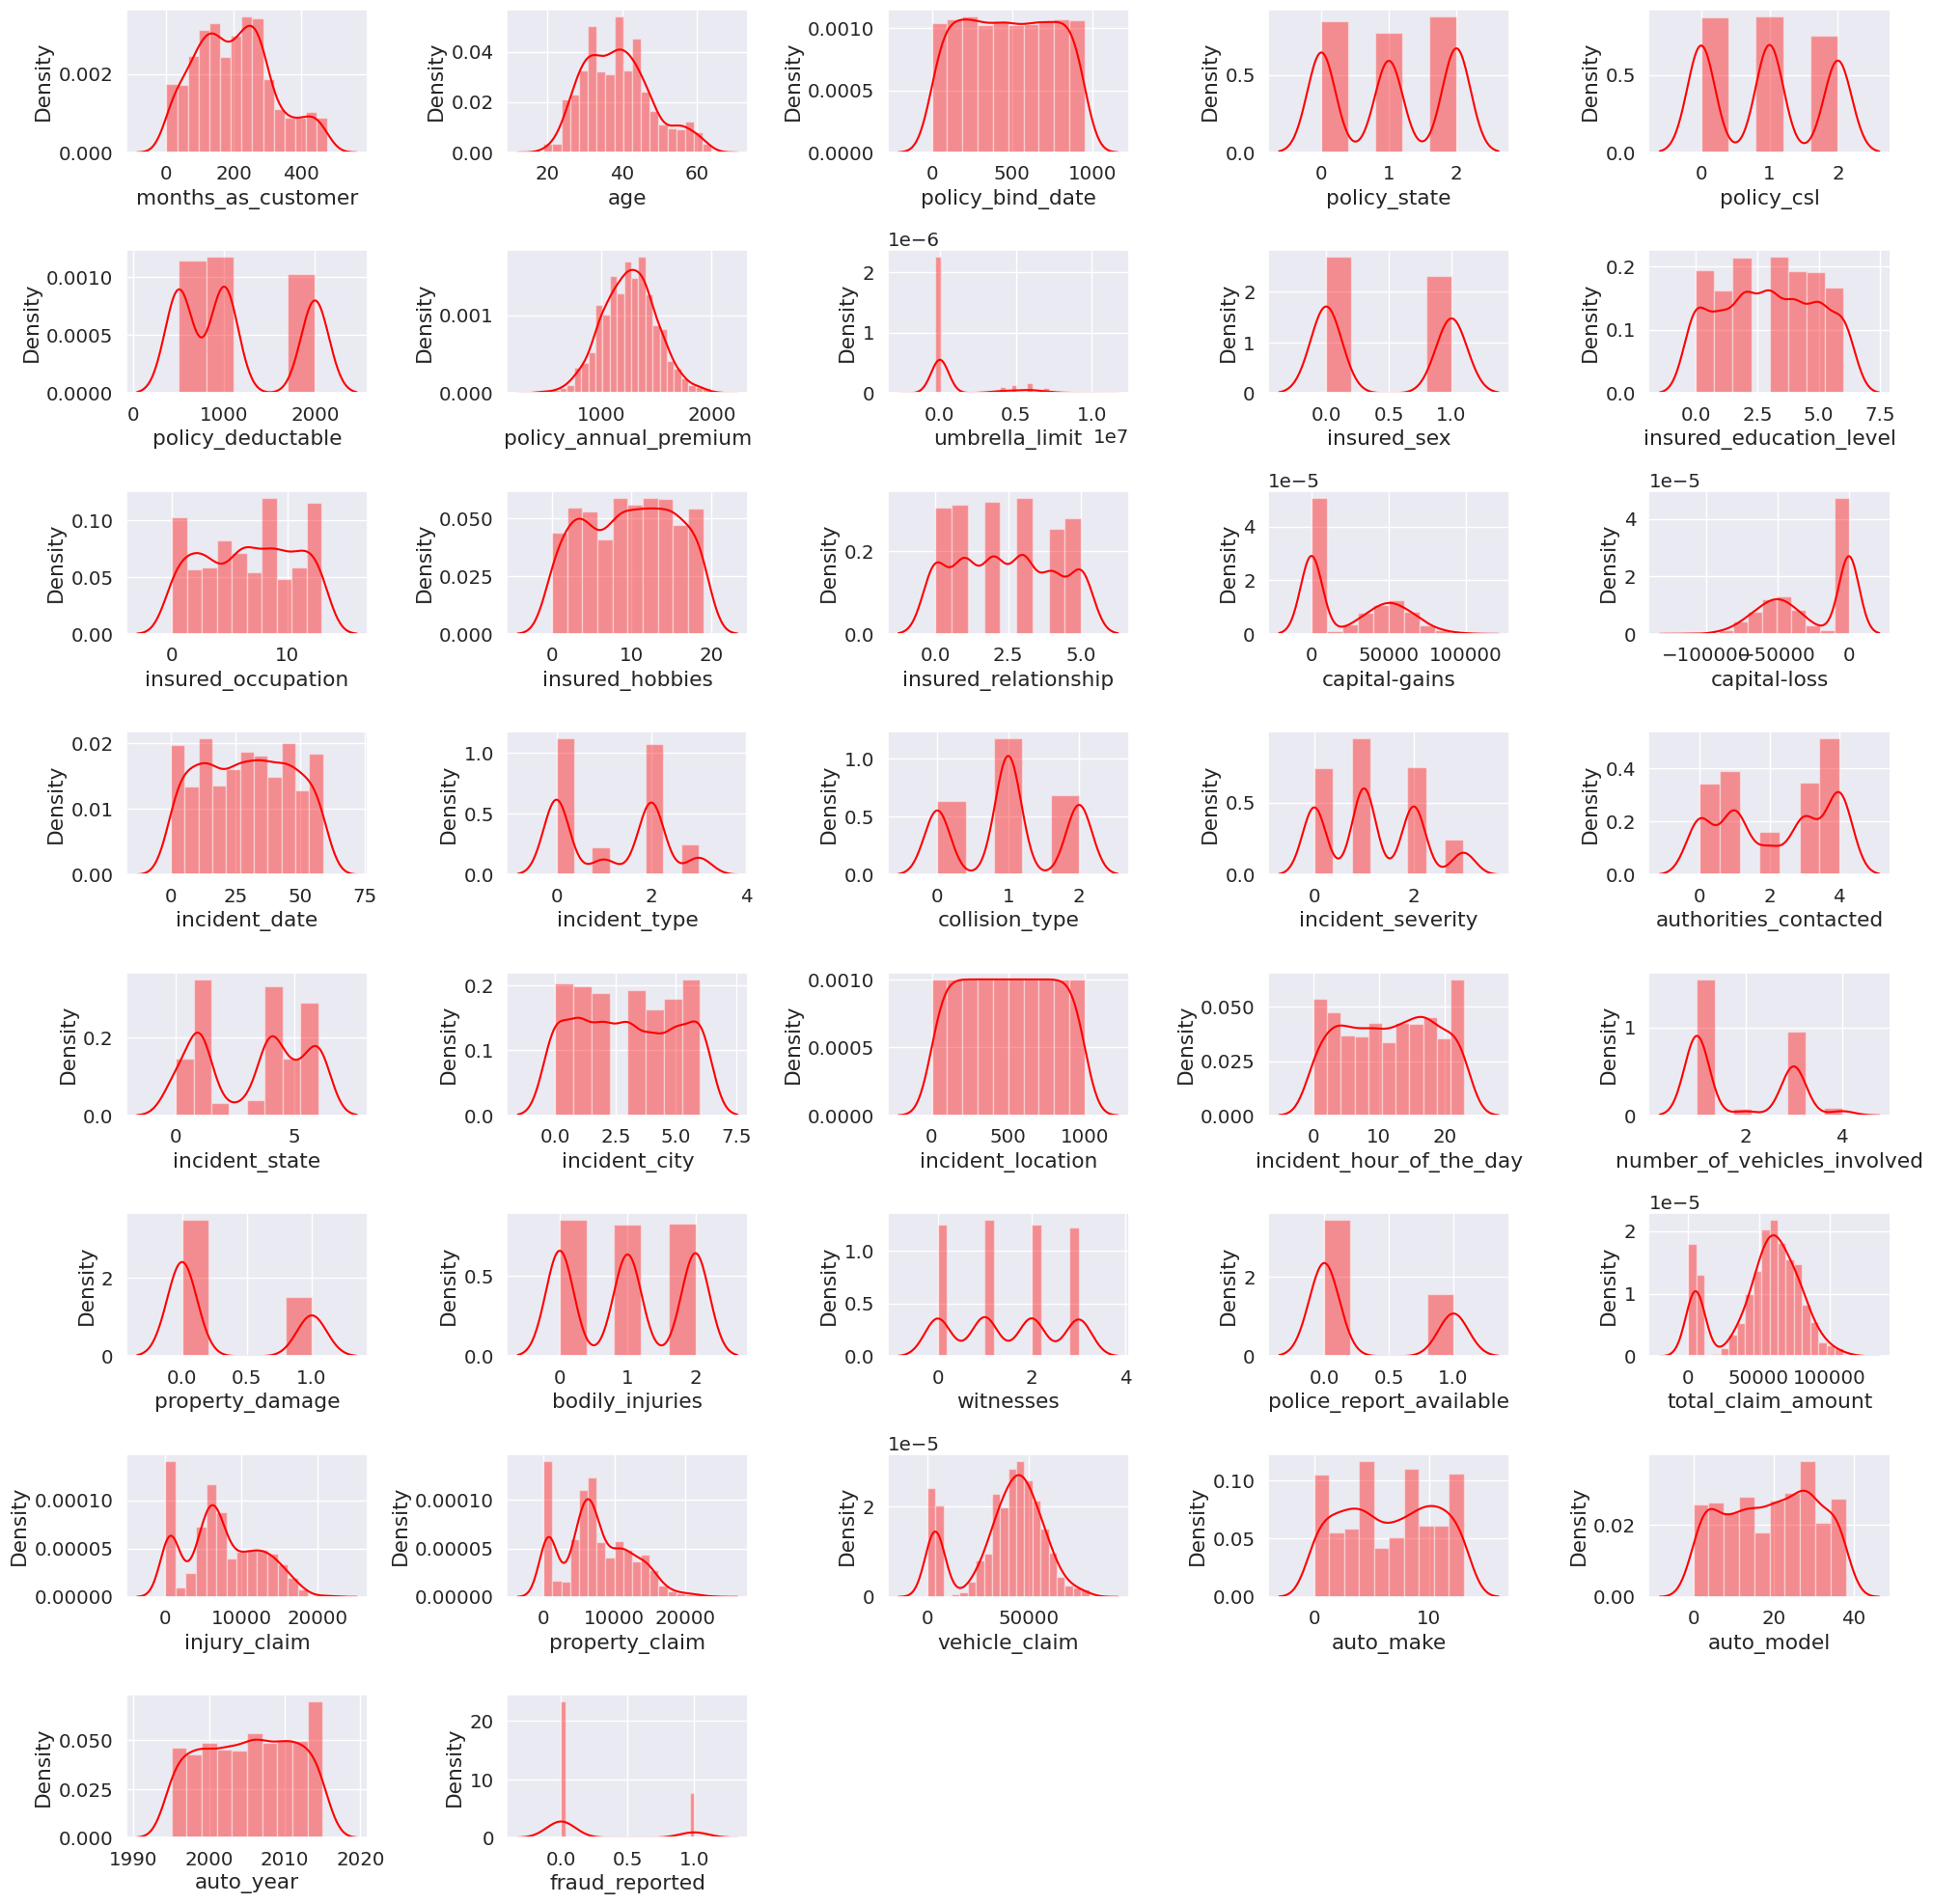

In [39]:
plt.figure(figsize=(20,20))
plot=1
for col in df.columns:
    if plot<=40:
        plt.subplot(8,5,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

In [40]:
df.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
fraud_reported                 1.175051
property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
injury_claim                   0.264811
insured_sex                    0.148630
incident_type                  0.101507
policy_csl                     0.088928
insured_relationship           0.077488
incident_city                  0.049531
witnesses                      0.019636
bodily_injuries                0.014777
policy_bind_date               0.005194
incident_date                  0.004756
policy_annual_premium          0.004402
incident_location              0.000000
insured_education_level       -0.000148
auto_make                     -0.018797


the columns 'umbrella_limit' and 'fraud_reported' have high positive skewness and the columns 'vehicle_claim' and 'total_claim_amount' have high negative skewness.

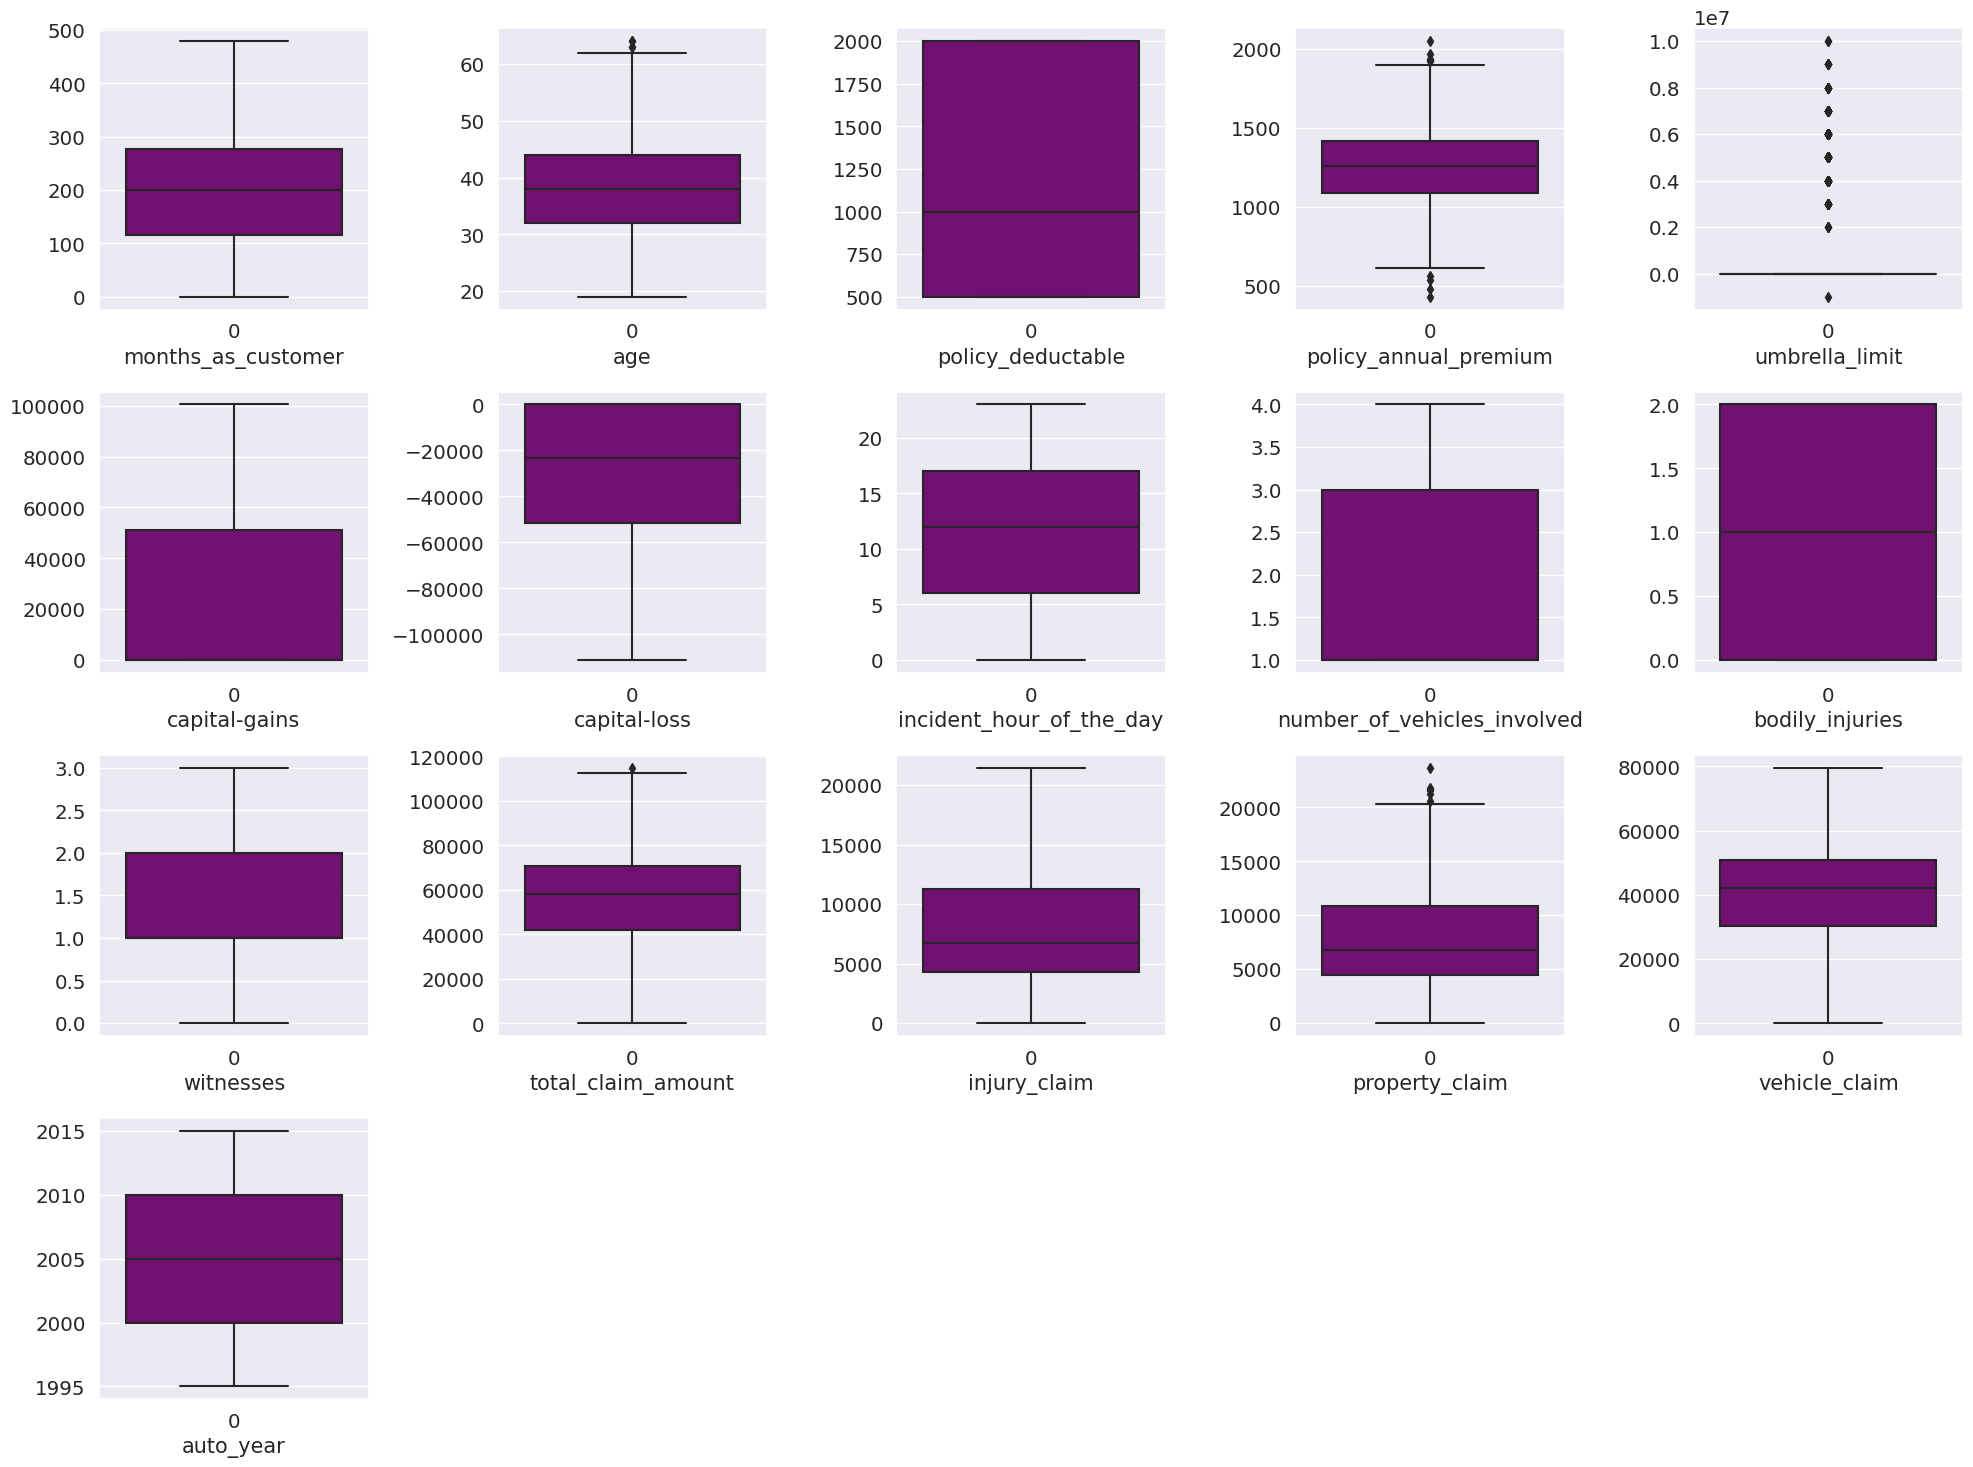

In [41]:
plt.figure(figsize=(20,18))
p=1
for i in num_cols:
    if p<=18:
        ax=plt.subplot(5,5,p)
        sns.boxplot(df[i],color='purple')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

The columns 'age', 'policy_annual_premium', 'umbrellla_limit', 'total_claim_amount', 'property_claim', are having outliers present in the data.

(1000, 36)
(1000,)
0    753
1    247
Name: fraud_reported, dtype: int64


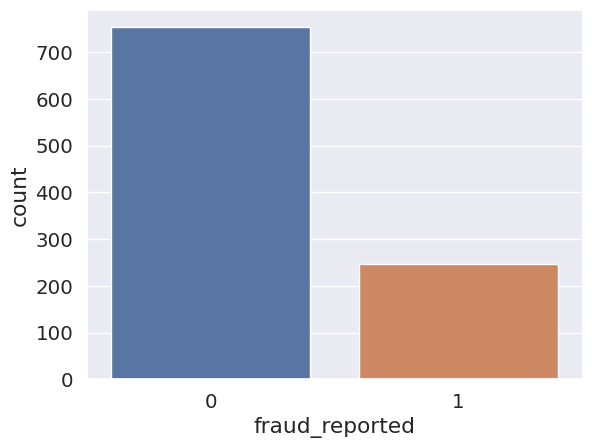

In [42]:
#Splitting the data into 'x' and 'y' labels-
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

print(x.shape)
print(y.shape)

sns.countplot(x=y)
print(y.value_counts())

-The data is not balanced. There is extreme imbalance present in the data. So we can balance the data using SMOTE technique .

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y=sm.fit_resample(x,y)
y

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1506, dtype: int64

1    753
0    753
Name: fraud_reported, dtype: int64


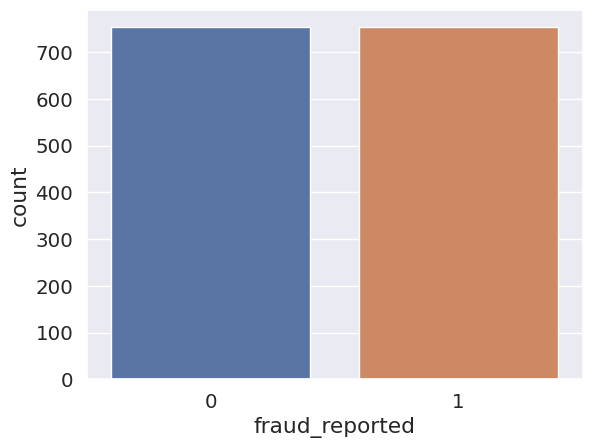

In [44]:
sns.countplot(x=y)
print(y.value_counts())

In [45]:
print(x.shape)
print(y.shape)

(1506, 36)
(1506,)


In [46]:
#We can set the skewness standard limit as +/-0.5.

x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

umbrella_limit                 1.671730
police_report_available        1.286146
property_damage                1.259601
incident_severity              0.709326
number_of_vehicles_involved    0.603893
capital-gains                  0.518083
total_claim_amount            -0.785175
vehicle_claim                 -0.817397
dtype: float64

In [47]:
from sklearn.preprocessing import power_transform
skewed = ['umbrella_limit','property_damage','police_report_available','incident_severity','number_of_vehicles_involved','total_claim_amount','vehicle_claim']
for col in skewed:
    x[col]=power_transform((x[col].values.reshape(-1,1)))
 

In [48]:
x.skew().sort_values(ascending = False)

police_report_available        1.286146
property_damage                1.259601
capital-gains                  0.518083
policy_deductable              0.471241
age                            0.465966
insured_sex                    0.435332
number_of_vehicles_involved    0.357764
months_as_customer             0.355801
property_claim                 0.340898
policy_csl                     0.336063
incident_type                  0.265045
incident_city                  0.195489
bodily_injuries                0.182824
policy_state                   0.165357
injury_claim                   0.162809
collision_type                 0.142441
insured_relationship           0.140098
witnesses                      0.134242
incident_severity              0.107795
incident_date                  0.100685
insured_education_level        0.097016
auto_make                      0.051718
policy_annual_premium          0.019834
insured_hobbies                0.017288
incident_location              0.012583


The column 'umbrella_limit' is still showing high skewness in data distribution so we can drop that column.

In [49]:
x.drop('umbrella_limit', axis = 1, inplace = True)

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(x))
thershold=3
df1=x[(z<3).all(axis = 1)]
df1['fraud_reported'] = y

In [51]:
x.shape

(1506, 35)

In [52]:
df1.shape

(1495, 36)

In [53]:
print ("Percentage of data loss ", (x.shape[0]-df1.shape[0])/x.shape[0]*100)

Percentage of data loss  0.7304116865869853


In [54]:
x = df1.drop('fraud_reported',axis = 1)
y = df1['fraud_reported']
z = x.columns
print(x.shape)
print(y.shape)

(1495, 35)
(1495,)


In [55]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x

months_as_customer       age  policy_bind_date  policy_state  \
0               1.131840  1.060716          0.197453      1.361447   
1               0.206866  0.368190          1.306907      0.112758   
2              -0.662609 -1.132285         -1.130821      1.361447   
3               0.465859  0.252768          1.095765     -1.135932   
4               0.206866  0.599032         -1.150016     -1.135932   
...                  ...       ...               ...           ...   
1490            1.150340  0.945295          1.429753     -1.135932   
1491            2.103063  2.214928          0.255037     -1.135932   
1492            0.456609  0.252768          1.022825      0.112758   
1493           -0.468365 -0.901443         -0.777639     -1.135932   
1494            1.455581  1.406980          1.184061     -1.135932   

      policy_csl  policy_deductable  policy_annual_premium  insured_sex  \
0       0.255401          -0.239426               0.685770     1.238506   
1       0.255401           1.492893              -0.240404     1.238506   
2      -1.056712           1.492893               0.713287    -0.807424   
3       0.255401           1.492893               0.724771    -0.807424   
4       1.567515          -0.239426               1.467557     1.238506   
...          ...                ...                    ...          ...   
1490   -1.056712           1.492893              -0.497031    -0.807424   
1491   -1.056712          -1.062278               0.172343    -0.807424   
1492    0.255401           1.063278               0.049468    -0.807424   
1493   -1.056712          -1.105586              -0.722541    -0.807424   
1494    1.567515          -0.052336               0.862366     1.238506   

      insured_education_level  insured_occupation  ...  bodily_injuries  \
0                    0.643078           -1.183276  ...         0.132463   
1                    0.643078           -0.132490  ...        -1.136976   
2                    1.728794            1.180991  ...         1.401902   
3                    1.728794           -1.445972  ...         0.132463   
4                   -1.528354            1.180991  ...        -1.136976   
...                       ...                 ...  ...              ...   
1490                -0.985496           -1.445972  ...        -1.136976   
1491                 1.185936           -1.183276  ...        -1.136976   
1492                -1.528354           -0.132490  ...        -1.136976   
1493                 1.728794            0.392902  ...        -1.136976   
1494                 1.185936           -0.657883  ...         0.132463   

      witnesses  police_report_available  total_claim_amount  injury_claim  \
0      0.599555                 1.832649            0.692045     -0.271896   
1     -1.313646                -0.545658           -1.946985     -1.518254   
2      1.556155                -0.545658           -0.941434     -0.013054   
3      0.599555                -0.545658            0.305379     -0.308873   
4     -0.357045                -0.545658           -1.910531     -1.405146   
...         ...                      ...                 ...           ...   
1490   0.599555                -0.545658            0.174386      0.711270   
1491  -1.313646                -0.545658            0.553513      1.255926   
1492  -1.313646                -0.545658            0.023562     -0.165096   
1493  -1.313646                -0.545658            0.506054      0.246441   
1494   0.599555                -0.545658           -1.953555     -1.510206   

      property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0           1.211689       0.727733   0.967252   -1.744568  -0.188509  
1          -1.540221      -1.953676   0.439692   -0.680025   0.340898  
2          -0.849995      -1.054950  -0.615428    1.061953   0.340898  
3          -0.290171       0.636321  -0.879207    1.449059   1.576180  
4          -1.569449      -1.918282  -1.670547    1.158730   0.693

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
vif(x)

Column Name   VIF Factor
0            months_as_customer     7.224862
1                           age     7.264044
2              policy_bind_date     1.034891
3                  policy_state     1.055392
4                    policy_csl     1.079549
5             policy_deductable     1.038832
6         policy_annual_premium     1.043022
7                   insured_sex     1.056156
8       insured_education_level     1.054381
9            insured_occupation     1.035748
10              insured_hobbies     1.065565
11         insured_relationship     1.063175
12                capital-gains     1.050291
13                 capital-loss     1.060832
14                incident_date     1.049819
15                incident_type     4.891884
16               collision_type     1.085203
17            incident_severity     1.339203
18        authorities_contacted     1.143704
19               incident_state     1.073649
20                incident_city     1.051853
21            incident_location     1.057992
22     incident_hour_of_the_day     1.125917
23  number_of_vehicles_involved     4.696828
24              property_damage     1.049878
25              bodily_injuries     1.046383
26                    witnesses     1.066382
27      police_report_available     1.082002
28           total_claim_amount  1892.757247
29                 injury_claim    85.661678
30               property_claim    81.443850
31                vehicle_claim   911.595741
32                    auto_make     1.073158
33                   auto_model     1.076851
34                    auto_year     1.048296

The columns 'total_claim_amount', 'vehicle_claim', 'property_claim', 'injury_claim', 'age',and months_as_customer' are having high inflation variance.

In [57]:
x1 = x.drop(['total_claim_amount','months_as_customer'], axis = 1)

In [58]:
vif(x1)

Column Name  VIF Factor
0                           age    1.064275
1              policy_bind_date    1.034341
2                  policy_state    1.054860
3                    policy_csl    1.076241
4             policy_deductable    1.038590
5         policy_annual_premium    1.041014
6                   insured_sex    1.054437
7       insured_education_level    1.052841
8            insured_occupation    1.033879
9               insured_hobbies    1.060941
10         insured_relationship    1.063033
11                capital-gains    1.046700
12                 capital-loss    1.058410
13                incident_date    1.046567
14                incident_type    4.855601
15               collision_type    1.084839
16            incident_severity    1.279558
17        authorities_contacted    1.126414
18               incident_state    1.068973
19                incident_city    1.049927
20            incident_location    1.056760
21     incident_hour_of_the_day    1.112082
22  number_of_vehicles_involved    4.688921
23              property_damage    1.049226
24              bodily_injuries    1.043622
25                    witnesses    1.064571
26      police_report_available    1.080530
27                 injury_claim    2.018322
28               property_claim    2.060565
29                vehicle_claim    2.957024
30                    auto_make    1.068144
31                   auto_model    1.076819
32                    auto_year    1.047122

In [59]:
x = x1.copy()

In [60]:
x.shape

(1495, 33)

In [61]:
y.shape

(1495,)

In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score

In [63]:
def random_st_cls(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = accuracy_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [64]:
def model_fit_cls(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    cv_score = cross_val_score(model,x,y, cv = 5)
    cv_mean = cv_score.mean()
    print(f" Accuracy score is: {accuracy_score(y_test,pred_test)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,pred_test))
    print ('\n','Classification Report:','\n',classification_report(y_test,pred_test))
    print("The cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(y_test,pred_test))
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,pred_test)-cv_mean)*100:.2f}')
    print("-"*50)

In [65]:
def model_cls(m):
    m_rs = random_st_cls(m)
    model_fit_cls(m,m_rs)

In [66]:
Model_classify = [LogisticRegression(),RandomForestClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),ExtraTreesClassifier(),XGBClassifier()]

In [78]:
for i in Model_classify:
    model_cls(i)


 LogisticRegression()
At random state  11 the model is having accuracy score of  0.8351893095768375
 Accuracy score is: 83.52

 Confusion matrix: 
 [[180  37]
 [ 37 195]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       217
           1       0.84      0.84      0.84       232

    accuracy                           0.84       449
   macro avg       0.84      0.84      0.84       449
weighted avg       0.84      0.84      0.84       449

The cv score is  0.7993311036789298 and the accuracy score  is  0.8351893095768375

 Difference between accuracy score and cross val score 3.59
--------------------------------------------------

 RandomForestClassifier()
At random state  38 the model is having accuracy score of  0.8930957683741648
 Accuracy score is: 88.64

 Confusion matrix: 
 [[185  30]
 [ 21 213]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.

Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,150,200],
             'criterion': ['gini', 'entropy', 'log_loss'],
             'min_samples_split': [1,2,3],
             'max_features':['sqrt','log2',None]}

grid = GridSearchCV(estimator = ExtraTreesClassifier(),param_grid=parameters, cv = 10)

In [69]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]})

In [70]:
grid.best_score_

0.8777628635346757

In [71]:
grid.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [84]:
final_model_cls= ExtraTreesClassifier(n_estimators = 100,criterion = 'gini',min_samples_split = 2,max_features = 'sqrt')
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 26)
final_model_cls.fit(x_train, y_train)
pred_etc = final_model_cls.predict(x_test)
print("Accuracy Score is ",accuracy_score(y_test,pred_etc))
print(classification_report(y_test,pred_etc))
cv_score = cross_val_score(final_model_cls,x,y, cv = 10)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.882943143812709
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       133
           1       0.92      0.87      0.89       166

    accuracy                           0.88       299
   macro avg       0.88      0.88      0.88       299
weighted avg       0.89      0.88      0.88       299

CV score is  0.8657404921700224


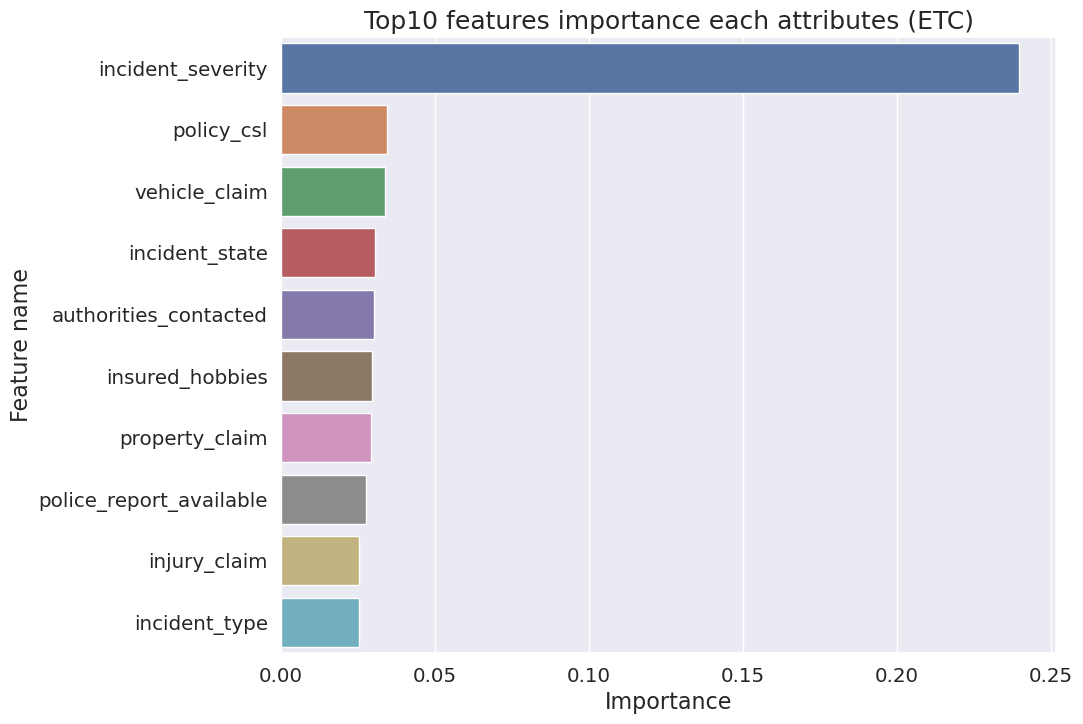

In [85]:
imp_id=pd.DataFrame({"Feature Name":x_train.columns,"Importance":final_model_cls.feature_importances_})
fi=imp_id.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title('Top10 features importance each attributes (ETC)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature name', fontsize=16)
plt.show()

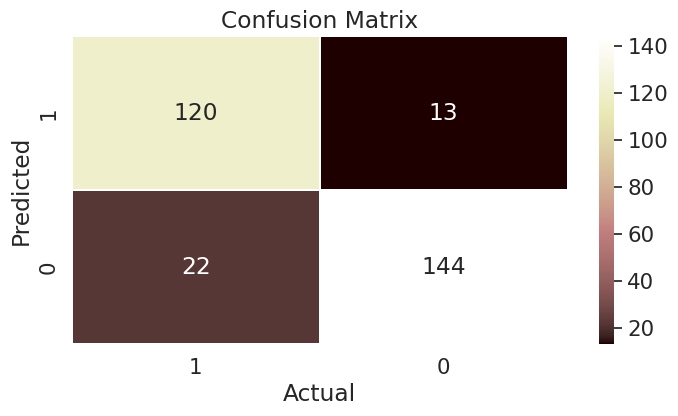

In [99]:
cm = confusion_matrix(y_test, pred_etc)
x_labels = ["1","0"]
y_labels = ["1","0"]
f, ax = plt.subplots(figsize =(8,4))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, cmap="pink", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

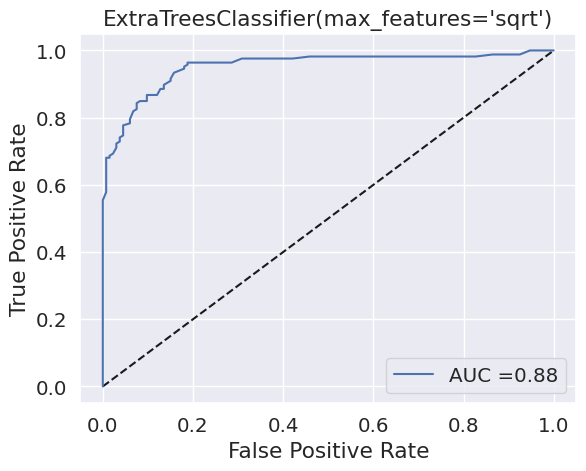

In [87]:
def auc_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()
auc_roc(final_model_cls)

In [88]:
import pickle

filename = 'Insurance claim model .pkl'
pickle.dump(final_model_cls,open(filename,'wb'))

In [89]:
original = np.array(y_test)
predicted = np.round(np.array(final_model_cls.predict(x_test)),0)
tom_prediction = pd.DataFrame({'Claim (Original)':original,'Claim(Predicted)':predicted})
tom_prediction.sample(10)

Claim (Original)  Claim(Predicted)
231                 0                 0
14                  0                 0
184                 0                 0
29                  1                 1
222                 1                 1
111                 0                 0
61                  1                 1
236                 0                 0
37                  0                 0
224                 0                 0